# Import Libraries

In [1]:
# ===============================
# Data Handling & Visualization
# ===============================
import numpy as np                     # Numerical computing
import pandas as pd                   # Data manipulation and analysis
import matplotlib.pyplot as plt       # Plotting library
import seaborn as sns                 # Statistical data visualization

# ===============================
# Scikit-learn: Modeling & Evaluation
# ===============================
from sklearn.linear_model import LogisticRegression                 # Logistic Regression model
from sklearn.ensemble import RandomForestClassifier                 # Random Forest classifier
from sklearn.feature_selection import RFE                           # Recursive Feature Elimination for feature selection
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold  # Cross-validation strategies
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder  # Data preprocessing tools
from sklearn.multioutput import MultiOutputClassifier               # Wrapper for multi-output classification
from sklearn.model_selection import GridSearchCV

# Evaluation Metrics
from sklearn.metrics import (
    precision_score, recall_score, f1_score,                      # Classification performance
    classification_report, accuracy_score,                       # Reports and accuracy
    cohen_kappa_score, hamming_loss,                             # Additional metrics
    confusion_matrix, ConfusionMatrixDisplay                     # Confusion matrix visualization
)

# ===============================
# TensorFlow / Keras: Deep Learning
# ===============================
import tensorflow as tf
from tensorflow.keras.models import Model                        # Functional API Model definition
from tensorflow.keras.layers import (                            # Common layers for model building
    Input, Dense, Conv1D, Flatten, Concatenate, Dropout
)
from tensorflow.keras.regularizers import l1_l2, l2, l1          # Regularization techniques

# ===============================
# Explainability
# ===============================
import shap                                                       # SHAP for model explainability (e.g., feature importance)


## Applying Seed

In [2]:
np.random.seed(42)
tf.random.set_seed(42)

# Data Path

The preprocessed datasets were loaded from a specific directory. The directory contains the following 4 CSV files:

- `X_train`, `X_test` (features)
- `y_train`, `y_test` (targets)

Example path:
```python
dataset_path = "/path/to/preprocessed_data/"


In [3]:
# Import the Google Colab drive module to access Google Drive files
from google.colab import drive

# Mount Google Drive to access files stored in it
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# preprocessed_data_path: Path for saving and downloading preprocessed data files
data_path = '/content/drive/MyDrive/Data Science & Decision Making/Preprocessed Data/'

# Initial Exploration of Individual Datasets

This section explores each dataset to understand its structure and key features for analysis.


## Loading All Datasets

All four datasets, **X_train**, **y_train**, **X_test** and **y_test**, are being loaded into the environment.  

Once loaded, each dataset will be examined individually.

In [5]:
# Load the datasets using the defined path
X_train = pd.read_csv(f'{data_path}X_train.csv')
X_test = pd.read_csv(f'{data_path}X_test.csv')
y_train = pd.read_csv(f'{data_path}y_train.csv')
y_test = pd.read_csv(f'{data_path}y_test.csv')

## Displaying All Four Datasets  

The first few rows (**head**) of each dataset are displayed to verify that the data is loading correctly. Additionally, the **shape** of each dataset is checked to understand its dimensions and ensure consistency before merging.  

In [6]:
X_train.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49
0,PFQTomzEXBwj,21,14,4,16,40,21,14,29,4,...,-3.208450,-2.260614,-3.435732,2.167014,-3.981050,3.609948,5.149901,-0.791115,1.751678,-1.287403
1,Z5T4f6OHLTaQ,21,14,3,14,37,22,23,25,3,...,1.232110,-1.578965,-2.742687,-5.529225,4.958709,1.229239,-6.418639,2.204051,-2.718269,-2.246960
2,2AlLf4SXlT1q,21,14,3,12,49,20,14,30,3,...,-1.644410,3.114393,1.941746,0.808115,-0.735024,-0.522410,4.622349,1.000125,0.410817,1.734306
3,DCAeqLbQa173,8,14,4,14,43,22,14,26,0,...,6.824129,5.622534,-3.300351,10.826127,2.907111,-1.103770,3.580812,1.873623,-5.979541,29.481630
4,XC6aisOM0WzL,21,1,3,15,36,18,14,23,1,...,-0.636121,0.907681,0.296508,0.773136,1.774446,-0.378903,6.245098,4.931806,0.847624,-2.574822


In [7]:
X_train.shape

(849, 75)

**Insight**

After completing the preprocessing steps on the training dataset:

- **Number of Features (Columns):** 75  
- **Number of Samples (Rows):** 849  

This indicates that the dataset is successfully prepared for training. Each of the 849 samples contains 75 processed features, ready for input into the model.


In [8]:
y_train.head()

,participant_id,ADHD_Outcome,Sex_F
0,PFQTomzEXBwj,1,0
1,Z5T4f6OHLTaQ,1,0
2,2AlLf4SXlT1q,1,1
3,DCAeqLbQa173,0,0
4,XC6aisOM0WzL,1,0


In [9]:
y_train.shape

(849, 3)

**Insight**

After completing the preprocessing steps on the training dataset:

- **Number of Labels (Columns):** 3  
- **Number of Samples (Rows):** 849  

This indicates that the dataset is successfully prepared for training. Each of the 849 samples contains 3 processed features, ready for input into the model.


In [10]:
X_test.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49
0,M6malGe8P7Ic,16,14,5,19,43,16,13,23,5,...,0.042328,0.133164,-1.258034,-0.528133,1.209805,2.515177,1.424469,1.612481,3.331654,-0.692718
1,XBAesR0BxzjQ,17,5,3,14,38,19,15,29,1,...,0.506541,0.246548,1.229287,-3.186183,2.560323,-1.557586,-1.235853,-2.838652,-1.305051,0.387983
2,PtxdLLjvEhIS,21,14,3,13,47,16,17,28,2,...,-0.331663,2.460719,0.029905,0.049345,3.726150,1.123901,0.330803,-1.276934,-1.533260,2.056757
3,OGitd7RL4GlH,1,6,4,12,45,17,18,26,1,...,-0.902931,1.091429,-0.851562,-2.721745,-2.711082,-0.587119,-1.744503,-1.413515,-1.133640,0.358284
4,X6mFs3EnxuJt,14,14,3,12,42,17,28,23,1,...,-0.037867,-0.172326,0.046520,-1.138162,3.025117,1.630760,-2.373074,1.039927,-0.980066,-3.172548


In [11]:
X_test.shape

(364, 75)

**Insight**

After completing the preprocessing steps on the testing dataset:

- **Number of Features (Columns):** 75  
- **Number of Samples (Rows):** 364  

This indicates that the dataset is successfully prepared for testing. Each of the 364 samples contains 75 processed features, ready for input into the model.


In [12]:
y_test.head()

,participant_id,ADHD_Outcome,Sex_F
0,M6malGe8P7Ic,1,1
1,XBAesR0BxzjQ,1,0
2,PtxdLLjvEhIS,1,0
3,OGitd7RL4GlH,1,0
4,X6mFs3EnxuJt,1,1


In [13]:
y_test.shape

(364, 3)

**Insight**

After completing the preprocessing steps on the testing dataset:

- **Number of Features (Columns):** 3  
- **Number of Samples (Rows):** 364  

This indicates that the dataset is successfully prepared for testing. Each of the 849 samples contains 75 processed features, ready for input into the model.


## Label Overview

To better understand the dataset, we investigate the distribution of key target labels: **Sex**, **ADHD Diagnosis**, and their **combination**. This helps identify class imbalances and guides fair model evaluation.


### Visualizing the Distribution of `label` (Sex and ADHD)

To understand the distribution of the `label` data, we can plot a bar plot for both **Sex** and **ADHD**. This will give us insights into the class balance in the dataset and help identify any potential imbalances between the categories.

#### Key observations:
- **Sex**: The distribution of male and female participants.
- **ADHD**: The count of participants diagnosed with ADHD compared to non-ADHD.

This visualization helps assess the balance between different classes and is important for further analysis and model training.



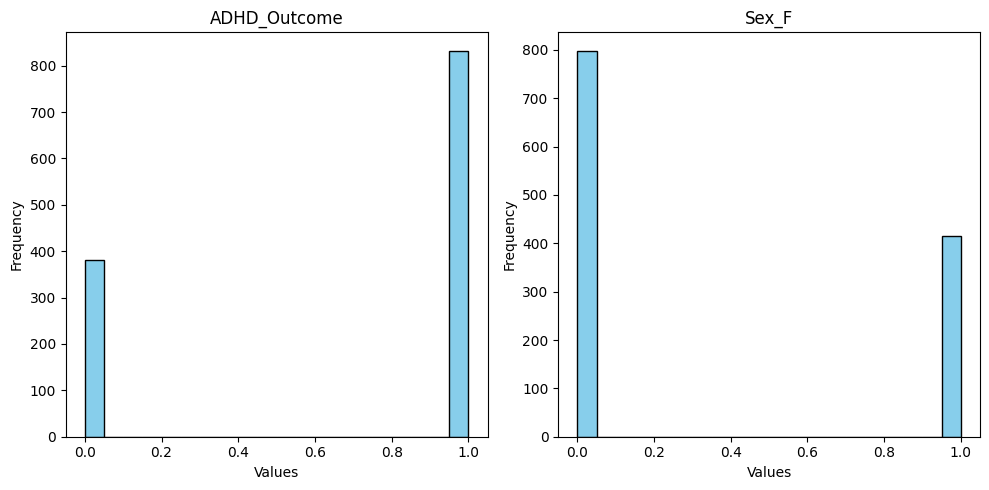

In [14]:
# Step 1: Drop participant_id if present and concatenate y_test and y_train
label = pd.concat([
    y_test.drop(columns=['participant_id'], errors='ignore'),
    y_train.drop(columns=['participant_id'], errors='ignore')
], axis=0)

# Step 2: Set up the number of subplots (one for each column)
num_columns = label.shape[1]

# Step 3: Create subplots
fig, axes = plt.subplots(1, num_columns, figsize=(num_columns * 5, 5))

# Ensure axes is iterable even when there's only one column
if num_columns == 1:
    axes = [axes]

# Step 4: Plot histograms for each column
for i, column in enumerate(label.columns):
    axes[i].hist(label[column], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')

# Step 5: Adjust layout
plt.tight_layout()
plt.show()

Insight:

After visualizing the **label dataset**, we observed the following:

1. **Gender Distribution**: There are more **male** participants compared to female participants in the dataset. This could indicate an imbalance in the gender distribution, which might impact the model's performance and generalizability. Addressing class imbalance may be considered during model training, such as using class weights or resampling techniques.

2. **ADHD Distribution**: The dataset also shows that **ADHD** cases are more prevalent than non-ADHD cases. This could lead to potential bias in model predictions if the distribution is too skewed. We may need to account for this imbalance through techniques like oversampling the minority class or using specific metrics that handle class imbalance (e.g., ROC AUC, F1-score) during evaluation.

These insights are essential to understanding the dataset and planning appropriate preprocessing or model strategies to ensure balanced predictions.


### Creating a Contingency Table of `Sex` and `ADHD_Outcome`

To better understand the relationship between **Sex** and **ADHD_Outcome**, we create a contingency table. This will show how these two variables are distributed across the dataset.

#### Heatmap Visualization:
A heatmap will provide a clear overview of the relationship between **Sex** and **ADHD_Outcome**, making it easier to visualize the frequency of combinations of the two variables. This will help in understanding any potential patterns or imbalances between the groups.

This step is important for ensuring that the data is balanced and to evaluate if there are any noticeable differences between **Sex** and **ADHD** outcome.



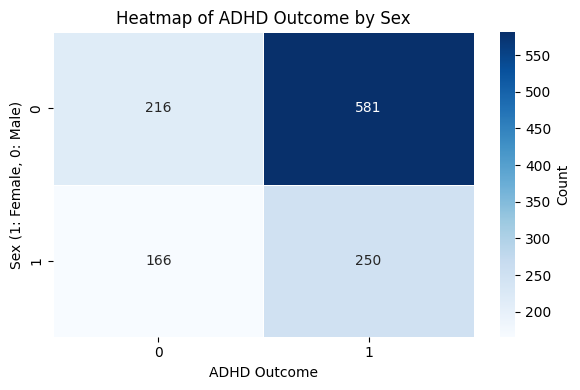

In [15]:
# Create a contingency table of Sex and ADHD_Outcome
contingency_table = pd.crosstab(label['Sex_F'], label['ADHD_Outcome'])

# Create a heatmap to visualize the contingency table
plt.figure(figsize=(6, 4))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'}, linewidths=0.5)

# Set chart title and labels
plt.title('Heatmap of ADHD Outcome by Sex')
plt.xlabel('ADHD Outcome')
plt.ylabel('Sex (1: Female, 0: Male)')

# Show the plot
plt.tight_layout()
plt.show()

Insight:

After visualizing the heatmap, we can observe the distribution of **Sex** and **ADHD_Outcome** in the dataset:

- **Male**:  
  - ADHD: 581  
  - Non-ADHD: 216

- **Female**:  
  - ADHD: 250
  - Non-ADHD: 166  

This distribution shows that **males** are more represented in the ADHD category, while **females** show a more balanced distribution between ADHD and non-ADHD outcomes. This insight can help in understanding potential gender-related patterns in ADHD prevalence within the dataset.


# Removing Identity Column from Features and Labels

The dataset contains a unique identifier column, **`participant_id`**, which does not contribute to the model’s learning process. To prevent data leakage and ensure that only relevant features are used for training, we remove this column from both the feature (`X_train`, `X_test`) and label (`y_train`, `y_test`) datasets.

**Steps Taken:**
1. **Feature Datasets (`X_train`, `X_test`)**: The `participant_id` column is dropped to ensure only predictive features remain.
2. **Label Datasets (`y_train`, `y_test`)**: Although unlikely to contain `participant_id`, we apply `.drop(..., errors='ignore')` to handle cases where it might be present.
   
This ensures that the model is trained on meaningful data while avoiding any influence from an identity-based column.


In [16]:
# Define the column representing participant identities
identity_col = "participant_id"

# Remove the identity column from the training and testing feature sets
X_train_except_identity_col = X_train.drop(columns=[identity_col])  # Drop 'participant_id' from X_train
X_test_identity_col = X_test.drop(columns=[identity_col])  # Drop 'participant_id' from X_test

# Remove the identity column from the target labels (y), if present
y_train_identity_col = y_train.drop(columns=[identity_col], errors='ignore')  # Avoid error if column doesn't exist in y_train
y_test_identity_col = y_test.drop(columns=[identity_col], errors='ignore')  # Avoid error if column doesn't exist in y_test

# Machine Learning Model: Why and How They Help

---

**Why Logistic Regression?**

- Logistic Regression is a **simple, interpretable baseline model** used for classification tasks.  
- It helps establish a **benchmark performance** before moving on to more complex models like CNN or hybrid architectures.  
- Due to its simplicity, it’s **less prone to overfitting**, especially with smaller datasets or fewer features.

**How This Helps**

- **Interpretability**: Coefficients indicate the direction and strength of feature contributions, making it easier to understand **which features are most predictive**.  
- **Baseline Comparison**: Helps assess whether deep learning models offer significant improvement over traditional methods.  
- **Quick to Train**: Fast training allows for **rapid experimentation** and testing with different subsets or preprocessing pipelines.

---

**Why Start with Machine Learning Models?**

- **Interpretability First**: Machine learning models like Logistic Regression and Random Forest provide clear interpretability, helping us understand relationships in the data.
- **Efficient Baseline**: These models are quick to train and tune, allowing for **early performance benchmarking**.
- **Data Insights**: Traditional models help uncover **feature importance**, **class imbalance issues**, and **data preprocessing needs**, which are crucial before building more complex models.
- **Avoid Premature Complexity**: By validating that simpler models are insufficient, we justify the move to deep learning architectures like CNNs or hybrid models.


##  Model Training: Logistic Regression with Feature Selection

We use **Logistic Regression** wrapped in a `MultiOutputClassifier` to handle multi-label prediction (e.g., predicting both ADHD and Sex outcomes).

**Steps:**
1. **Base Model**:  
   A logistic regression model with L2 regularization is defined as the base learner. The `liblinear` solver is chosen for its stability with smaller datasets.

2. **Multi-Output Handling**:  
   `MultiOutputClassifier` is used to apply logistic regression independently to each target label (e.g., ADHD and Sex), enabling multi-label classification.

3. **Feature Selection with RFE**:  
   Recursive Feature Elimination (RFE) is applied to select the **top 50 most relevant features**, reducing dimensionality and improving model generalization.

4. **Training**:  
   The logistic regression model is trained on the reduced feature set after RFE, ensuring that only the most informative features contribute to the final predictions.


In [17]:
def train_multi_output_logistic_model_with_tuning(X_train, y_train_identity_col, X_test, y_test_identity_col,
                                                 stratify_col='ADHD_Outcome', n_splits=15, random_state=42):
    """
    Trains a multi-output logistic regression model using RFE for feature selection and cross-validation.
    Also performs hyperparameter tuning for logistic regression parameters (C, penalty, max_iter).

    Parameters:
        X_train (DataFrame): Training features.
        y_train_identity_col (DataFrame): Training target with multiple output labels.
        X_test (DataFrame): Test features.
        y_test_identity_col (DataFrame): Test labels.
        stratify_col (str): Column name used for stratified splitting.
        n_splits (int): Number of cross-validation folds.
        random_state (int): Random state for reproducibility.

    Returns:
        model (MultiOutputClassifier): Trained model.
        X_train_rfe (ndarray): Feature-selected training data.
        X_test_rfe (ndarray): Feature-selected test data.
        metrics_df (DataFrame): DataFrame containing Precision, Recall, and F1-score per fold.
        best_params (dict): Best hyperparameters found during tuning.
        cv_scores (list): Cross-validation accuracy scores.
    """
    # 1. Base model and RFE feature selection
    base_model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=random_state)
    multi_output_model = MultiOutputClassifier(base_model)

    rfe = RFE(base_model, n_features_to_select=50)  # Default for n_features is 50
    X_train_rfe = rfe.fit_transform(X_train, y_train_identity_col[stratify_col])
    X_test_rfe = rfe.transform(X_test)

    # 2. Hyperparameter tuning for Logistic Regression using GridSearchCV
    param_grid = {
        'estimator__penalty': ['l1','l2'],  # Regularization type
        'estimator__max_iter': [100, 500, 1000]  # Max iterations for convergence
    }

    # Setting up GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(
        multi_output_model,
        param_grid,
        cv=n_splits,
        scoring='f1',
        verbose=1,
        n_jobs=-1
    )

    # 3. Perform hyperparameter tuning
    grid_search.fit(X_train_rfe, y_train_identity_col)

    best_params = grid_search.best_params_  # Best hyperparameters found by GridSearchCV
    print(f"Best Hyperparameters: {best_params}")

    # 4. Final model training with best hyperparameters
    multi_output_model.set_params(**best_params)
    multi_output_model.fit(X_train_rfe, y_train_identity_col)

    # 5. Cross-validation for evaluation
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    metrics_data = {'Fold': [], 'Precision': [], 'Recall': [], 'F1-Score': [], 'Cohen_Kappa': [], 'Hamming_Loss': []}
    cv_scores = []

    for fold_num, (train_idx, val_idx) in enumerate(cv.split(X_train_rfe, y_train_identity_col[stratify_col]), 1):
        X_fold_train, X_fold_val = X_train_rfe[train_idx], X_train_rfe[val_idx]
        y_fold_train = y_train_identity_col.iloc[train_idx]
        y_fold_val = y_train_identity_col.iloc[val_idx]

        multi_output_model.fit(X_fold_train, y_fold_train)
        score = multi_output_model.score(X_fold_val, y_fold_val)
        cv_scores.append(score)

        y_fold_pred = multi_output_model.predict(X_fold_val)

        # Calculate precision, recall, and F1-score for each output
        precision = precision_score(y_fold_val, y_fold_pred, average='micro')
        recall = recall_score(y_fold_val, y_fold_pred, average='micro')
        f1 = f1_score(y_fold_val, y_fold_pred, average='micro')
        kappa = cohen_kappa_score(y_fold_val.values.ravel(), y_fold_pred.ravel())
        hamming = hamming_loss(y_fold_val, y_fold_pred)

        # Append metrics for the current fold
        metrics_data['Fold'].append(fold_num)
        metrics_data['Precision'].append(precision)
        metrics_data['Recall'].append(recall)
        metrics_data['F1-Score'].append(f1)
        metrics_data['Cohen_Kappa'].append(kappa)
        metrics_data['Hamming_Loss'].append(hamming)

    # Convert metrics data to DataFrame
    metrics_df = pd.DataFrame(metrics_data)

    return multi_output_model, X_train_rfe, X_test_rfe, metrics_df, best_params, cv_scores, rfe

##  Test Set Evaluation and Prediction

After training the model, we evaluate its performance on the test set using a comprehensive set of metrics to assess predictive quality for both **ADHD diagnosis** and **Sex classification**.

---

**Evaluation Metrics**

- **Test Accuracy**:  
  The average accuracy across all target labels is computed using `.score()` on the test set.

- **Label-Wise Performance**:
  For each target (`Sex` and `ADHD`), we compute:
  - **Precision**: The proportion of true positives among all predicted positives.
  - **Recall**: The proportion of true positives among all actual positives.
  - **F1 Score**: The harmonic mean of precision and recall.
  - **Cohen's Kappa**: A measure of agreement between true and predicted labels, adjusted for chance.
  - **Hamming Loss**: The fraction of labels incorrectly predicted.

- **Combined Classification**:  
  We also evaluate the model's ability to jointly predict both labels (`Sex + ADHD`) as a single multi-class label using:
  - **Macro-Averaged Precision, Recall, F1 Score**
  - **Cohen's Kappa**
  - **Combined Hamming Loss**

---

**Prediction Output**

- The model generates predictions on the test set using `.predict()`, producing both label-wise and joint outputs.
- Results are compiled into a DataFrame containing:
  - `participant_id`
  - True and predicted labels for both `Sex` and `ADHD`

This multi-metric approach ensures a well-rounded assessment of model behavior, robustness, and fairness across different demographic and diagnostic categories.


In [18]:
def evaluate_and_predict_model(model, X_test, y_test, threshold=0.5):
    """
    Evaluates a trained multi-output model by computing classification metrics for
    Sex and ADHD prediction, as well as joint correctness (combined accuracy).

    Arguments:
    - model: Trained model to evaluate.
    - X_test: Test data features.
    - y_test: Ground truth labels as a DataFrame with columns ['ADHD_Outcome', 'Sex_F'].
    - threshold: Probability threshold for converting outputs to binary predictions.

    Returns:
    - results_dict: Dict containing correct/incorrect counts per label and combined.
    - y_pred: Binary predicted labels.
    - y_pred_prob: Raw predicted probabilities.
    - X_test: Input test features (returned for convenience).
    - metrics: Dict of performance metrics.
    """
    # Predict probabilities
    y_pred_prob = model.predict(X_test)

    # Ensure output shape is correct
    if y_pred_prob.ndim == 1:
        y_pred_prob = y_pred_prob.reshape(-1, 1)
    if y_pred_prob.shape[1] != y_test.shape[1]:
        raise ValueError("Mismatch between prediction output shape and number of labels.")

    # Convert probabilities to binary predictions using threshold
    y_pred = (y_pred_prob > threshold).astype(int)

    # Extract true values
    y_true = y_test.values
    y_true_adhd = y_test['ADHD_Outcome'].values
    y_true_sex = y_test['Sex_F'].values

    # Predicted values per label
    adhd_index = list(y_test.columns).index('ADHD_Outcome')
    sex_index = list(y_test.columns).index('Sex_F')

    y_pred_adhd = y_pred[:, adhd_index]
    y_pred_sex = y_pred[:, sex_index]

    # Compute metrics per label
    def compute_metrics(y_true, y_pred, label):
      average_type = 'binary' if len(np.unique(y_true)) == 2 else 'macro'

      return {
          f'Accuracy_{label}': accuracy_score(y_true, y_pred),
          f'Precision_{label}': precision_score(y_true, y_pred, zero_division=0, average=average_type),
          f'Recall_{label}': recall_score(y_true, y_pred, zero_division=0, average=average_type),
          f'F1_Score_{label}': f1_score(y_true, y_pred, zero_division=0, average=average_type),
          f'Cohen_Kappa_{label}': cohen_kappa_score(y_true, y_pred),
          f'Hamming_Loss_{label}': hamming_loss(y_true, y_pred)
      }

    metrics = {}
    metrics.update(compute_metrics(y_true_sex, y_pred_sex, 'Sex'))
    metrics.update(compute_metrics(y_true_adhd, y_pred_adhd, 'ADHD'))

    # Combined correctness (per sample: both ADHD and Sex correct)
    combined_correct_mask = np.all(y_pred == y_true, axis=1)

    # Count correct/incorrect
    def get_counts(y_true_bin, y_pred_bin, label_name):
        correct = int(np.sum(y_true_bin == y_pred_bin))
        incorrect = int(len(y_true_bin) - correct)
        return {
            'correct': correct,
            'incorrect': incorrect,
            'y_true': y_true_bin,
            'y_pred': y_pred_bin
        }

    results_dict = {
        'Sex_F': get_counts(y_true_sex, y_pred_sex, 'Sex_F'),
        'ADHD_Outcome': get_counts(y_true_adhd, y_pred_adhd, 'ADHD_Outcome'),
        'Combined': {
            'correct': int(np.sum(combined_correct_mask)),
            'incorrect': int(len(combined_correct_mask) - np.sum(combined_correct_mask)),
            'y_true': y_true,
            'y_pred': y_pred
        }
    }

    # Add combined metrics as well
    joint_true = [f"{a}_{b}" for a, b in zip(y_true_adhd, y_true_sex)]
    joint_pred = [f"{a}_{b}" for a, b in zip(y_pred_adhd, y_pred_sex)]
    metrics.update(compute_metrics(joint_true, joint_pred, 'Combined'))

    return results_dict, y_pred, y_pred_prob, X_test, metrics

# CNN for Numerical Data + MLP / ANN for Categorical Data

**Why CNN for Numerical Data (fMRI + Other Numeric Features)?**  
- Convolutional Neural Networks (CNNs) are well-suited for structured numerical data such as **fMRI-derived features** and other numerical inputs.  
- They can detect **local patterns** and **hierarchical relationships** by sliding filters across feature dimensions.  
- This helps extract high-level features useful for classification tasks.

**Why MLP or ANN for Numerical Data?**  
- Multi-Layer Perceptrons (MLPs) or standard Artificial Neural Networks (ANNs) are commonly used for **tabular categorical data**.  
- They transform categorical inputs (via one-hot encoding or embeddings) into meaningful latent representations through dense layers.  
- Both MLPs and ANNs can model complex, nonlinear interactions between categorical variables.

**Combining CNN with MLP / ANN**  
- Since the dataset includes a **mix of continuous and categorical variables**, a hybrid architecture is used:
  - **CNN branch** handles continuous inputs (e.g., fMRI, other numeric features).
  - **MLP or ANN branch** handles categorical inputs (e.g., site, ethnicity, parental education).
  - Outputs from both branches are **concatenated** to form a joint representation.
  - Final dense layers use this representation for classification.

**Why Try Both CNN+MLP and CNN+ANN?**
- **CNN+MLP** provides a more regularized structure with progressive reduction in units.
- **CNN+ANN** can offer flexibility with more layers or units based on architecture tuning.
- Comparing both helps determine which structure better captures the relationship between multimodal data for the classification task.

## Separating Categorical Columns

The following categorical columns are extracted from the dataset to be processed separately using an **MLP (Multi-Layer Perceptron)**:

- `"EHQ_EHQ_Total"`: Handedness score, which has been categorized based on the Edinburgh Handedness Inventory.
- `"Basic_Demos_Study_Site"`: The study site where data was collected.
- `"PreInt_Demos_Fam_Child_Ethnicity"`: Categorical encoding for ethnicity.
- `"PreInt_Demos_Fam_Child_Race"`: Categorical encoding for race.
- `"MRI_Track_Scan_Location"`: Location where the MRI scan was performed.
- `"Barratt_Barratt_P1_Edu"`: Parent 1’s education level.
- `"Barratt_Barratt_P1_Occ"`: Parent 1’s occupation category.
- `"Barratt_Barratt_P2_Edu"`: Parent 2’s education level.
- `"Barratt_Barratt_P2_Occ"`: Parent 2’s occupation category.

These features have been processed separately using embedding layers or one-hot encoding before being fed into the MLP, ensuring that categorical data is properly incorporated into the hybrid CNN-MLP model.


In [19]:
# Define the categorical columns in the dataset
categorical_columns = [
    "EHQ_EHQ_Total",                     # Total score from EHQ questionnaire
    "Basic_Demos_Study_Site",            # Study site where participant data was collected
    "PreInt_Demos_Fam_Child_Ethnicity",  # Ethnicity of the child
    "PreInt_Demos_Fam_Child_Race",       # Race of the child
    "MRI_Track_Scan_Location",           # Location where MRI scan was performed
    "Barratt_Barratt_P1_Edu",            # Education level of Parent 1
    "Barratt_Barratt_P1_Occ",            # Occupation of Parent 1
    "Barratt_Barratt_P2_Edu",            # Education level of Parent 2
    "Barratt_Barratt_P2_Occ"             # Occupation of Parent 2
]

## Ensuring Correct Data Types for Categorical and Numerical Columns

To ensure that the data is properly prepared for model training, we separate the categorical and numerical columns and enforce appropriate data types.

### **Steps Taken:**
1. **Categorical Columns**:
   - Categorical columns are explicitly converted to **strings** using `astype(str)` to ensure consistent handling in models like MLP, which require categorical data in string format (or encoded via embeddings/one-hot encoding).
   - This is applied to both the training (`X_train_cat`) and test (`X_test_cat`) datasets.

2. **Numerical Columns**:
   - Numerical columns (all columns that are not categorical) are converted to **float32** using `astype(np.float32)` for efficient memory usage and to ensure compatibility with machine learning algorithms.
   - This is applied to both the training (`X_train_num`) and test (`X_test_num`) datasets.

This step ensures that categorical data is correctly processed as strings and numerical data is in the appropriate format for the model.


In [20]:
# Extract the categorical columns from X_train and X_test, and convert them to strings
X_train_cat = X_train_except_identity_col[categorical_columns].astype(str)  # Convert selected categorical columns in X_train to string
X_test_cat = X_test_identity_col[categorical_columns].astype(str)  # Convert selected categorical columns in X_test to string

# Extract the numerical columns from X_train and X_test, and convert them to float32 for better memory efficiency
X_train_num = X_train_except_identity_col.drop(columns=categorical_columns).astype(np.float32)  # Convert the remaining numerical columns in X_train to float32
X_test_num = X_test_identity_col.drop(columns=categorical_columns).astype(np.float32)  # Convert the remaining numerical columns in X_test to float32

## CNN + MLP Hybrid Architecture

The model is designed as a hybrid of two deep learning architectures: **Convolutional Neural Networks (CNN)** for numerical data and **Multi-Layer Perceptron (MLP)** for categorical data. This design allows the model to handle both types of data simultaneously, improving its ability to learn from complex relationships in the dataset. Here’s a breakdown of the model:

### 1. CNN for Numerical Data:
- **Purpose**: CNNs are excellent for extracting local patterns in data, making them suitable for sequential or grid-like data. Here, we apply CNN layers to the **numerical data** to capture spatial and temporal patterns that may exist in the features.
  
- **Input Shape**: The model receives numerical data of shape `(input_shape_num[1], 1)`, where `input_shape_num[1]` represents the number of numerical features.
  
- **Layers**:
  - **Conv1D**: A 1D convolutional layer with 64 filters, a kernel size of 3, and ReLU activation. This layer detects features in the input data, which are then passed through a **Dropout** layer to avoid overfitting.
  - **Second Conv1D**: Another convolutional layer with 128 filters, helping the model capture more complex patterns.
  - **Flatten**: Flattens the output from the convolutional layers to feed into dense layers.
  - **Dense**: A fully connected layer with 128 units and ReLU activation. Dropout is applied to prevent overfitting.

- **Why CNN**: CNN is used here because it can automatically learn local feature representations, which is particularly beneficial when the numerical features have a grid-like or sequential structure.

---

### 2. MLP for Categorical Data:
- **Purpose**: MLPs are effective for handling categorical data where the relationships between features might not be local or sequential, but rather represent global dependencies between features.
  
- **Input Shape**: The input for the categorical data is shaped `(input_shape_cat[1],)`, where `input_shape_cat[1]` is the number of categorical features.
  
- **Layers**:
  - **Dense**: A fully connected layer with 128 units and ReLU activation. This allows the model to learn complex representations of categorical features.
  - **Dropout**: Dropout layers are applied after each dense layer to prevent overfitting and ensure that the model generalizes well.
  - **Second Dense**: A layer with 64 units to further refine the model’s representation.

- **Why MLP**: MLPs are ideal for handling categorical data, as they can learn non-linear relationships between the input features. Categorical features often need to be transformed (e.g., using one-hot encoding or embeddings), and MLPs can process these efficiently.

---

### 3. Merging CNN and MLP Outputs:
- **Purpose**: After processing the data through the CNN (for numerical) and MLP (for categorical), the outputs from both branches are concatenated to form a unified representation of both data types.
  
- **Layers**:
  - **Concatenate**: The outputs of both the CNN and MLP branches are merged, ensuring that both numerical and categorical data contribute to the final decision-making process.
  - **Dense Layers**: After concatenation, a series of dense layers with ReLU activation is used to further process the combined representation. These layers are followed by **Dropout** layers to prevent overfitting.

- **Why Merge CNN and MLP**: By merging the outputs of both networks, the model can learn richer representations that take into account the complex relationships between numerical and categorical features simultaneously.

---

### 4. Output Layer:
- **Purpose**: The final layer is used to make predictions, which is typically a classification task in this context.
  
- **Activation Function**: The output layer uses a **sigmoid** activation function, which is commonly used for multi-label classification tasks. This allows the model to output probabilities for each class independently.
  
- **Loss Function**: The model is compiled using **binary cross-entropy** as the loss function, which is suitable for multi-label classification tasks where each output is independent of the others.

---

### Key Hyperparameters:
- **L2 Regularization (`l2_strength`)**: This parameter is used to prevent overfitting by adding a penalty to large weights. A value of `0.01` is typical, but this can be adjusted based on model performance.
  
- **Dropout Rate**: Dropout layers are used to randomly set a fraction of input units to zero during training to prevent overfitting. A rate of `0.3` is used here, which means 30% of the units are dropped at each step.

---

### Model Architecture:

1. **Input Layers**:
   - **Numerical Data**: `num_input` accepts the numerical features.
   - **Categorical Data**: `cat_input` accepts the categorical features.

2. **CNN Branch**:
   - Convolutional layers to process numerical data, followed by dropout and dense layers.

3. **MLP Branch**:
   - Fully connected layers to process categorical data, followed by dropout.

4. **Concatenation**:
   - The outputs of both branches are merged.

5. **Dense Layers**:
   - After merging, dense layers further refine the features before the final output.

6. **Output Layer**:
   - A sigmoid activation function to output multi-label predictions.

---

### Why this Model?

This hybrid model (CNN + MLP) is well-suited for datasets containing both numerical and categorical data. The CNN branch efficiently captures local patterns in numerical data, while the MLP branch can handle categorical relationships, such as those found in demographic or categorical study data. By merging the outputs, the model can leverage both data types in making predictions.

In summary, this architecture is designed to maximize the potential of both CNNs for numerical data and MLPs for categorical data, providing an optimal solution for handling mixed data types in predictive modeling tasks.


In [21]:
def create_model_cnn_mlp(input_shape_num, input_shape_cat, num_classes, l2_strength=0.01, dropout_rate=0.3):
    # CNN for numerical data
    num_input = Input(shape=(input_shape_num[1], 1))  # Input for numerical data
    x = Conv1D(64, kernel_size=3, activation='relu', kernel_regularizer=l2(l2_strength))(num_input)  # First Conv1D layer with L2
    x = Dropout(dropout_rate)(x)  # Dropout after first Conv1D layer
    x = Conv1D(128, kernel_size=3, activation='relu', kernel_regularizer=l2(l2_strength))(x)  # Second Conv1D layer with L2
    x = Flatten()(x)  # Flatten output to feed into dense layer
    cnn_output = Dense(128, activation='relu', kernel_regularizer=l2(l2_strength))(x)  # Fully connected layer after CNN with L2
    cnn_output = Dropout(dropout_rate)(cnn_output)  # Dropout after dense layer in CNN

    # MLP for categorical data
    cat_input = Input(shape=(input_shape_cat[1],))  # Input for categorical data
    y = Dense(128, activation='relu', kernel_regularizer=l2(l2_strength))(cat_input)  # First dense layer for categorical data with L2
    y = Dropout(dropout_rate)(y)  # Dropout after first dense layer in MLP
    y = Dense(64, activation='relu', kernel_regularizer=l2(l2_strength))(y)  # Second dense layer with L2
    mlp_output = Dense(128, activation='relu', kernel_regularizer=l2(l2_strength))(y)  # Fully connected layer after MLP with L2
    mlp_output = Dropout(dropout_rate)(mlp_output)  # Dropout after final MLP layer

    # Concatenate both CNN and MLP outputs
    merged = Concatenate()([cnn_output, mlp_output])  # Merge CNN and MLP outputs
    z = Dense(128, activation='relu', kernel_regularizer=l2(l2_strength))(merged)  # Fully connected layer after merging with L2
    z = Dropout(dropout_rate)(z)  # Dropout after merging CNN and MLP
    z = Dense(64, activation='relu', kernel_regularizer=l2(l2_strength))(z)  # Another dense layer with L2
    z = Dropout(dropout_rate)(z)  # Dropout before final output layer
    z = Dense(num_classes, activation='sigmoid')(z)  # Output layer for multi-label classification

    # Build and compile the model
    model = Model(inputs=[num_input, cat_input], outputs=z)  # Define model with two input layers
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Compile the model

    return model  # Return the compiled model

## CNN + ANN Hybrid Architecture  

The model is designed as a hybrid of two deep learning architectures: **Convolutional Neural Networks (CNN)** for numerical data and **Artificial Neural Networks (ANN)** for categorical data. This structure enables the model to effectively learn from **both continuous (fMRI & other numerical features) and categorical (demographic & metadata) inputs**, improving classification performance.  

---

### 1. CNN for Numerical Data  
- **Purpose**: CNNs are specialized for detecting spatial and hierarchical patterns in structured data. Here, we apply **1D Convolutional layers** to numerical inputs (e.g., fMRI-derived features) to capture relevant relationships.  
- **Input Shape**: `(input_shape_num[1], 1)`, where `input_shape_num[1]` is the number of numerical features.  
- **Layers**:  
  - **Conv1D (64 filters, kernel size 3, ReLU activation)** → Detects local patterns.  
  - **Dropout (0.3)** → Prevents overfitting.  
  - **Conv1D (128 filters)** → Captures higher-level patterns.  
  - **Flatten** → Prepares extracted features for dense layers.  
  - **Dense (128 units, ReLU, Dropout 0.3)** → Learns high-level numerical representations.  
- **Why CNN?** CNNs can **extract complex numerical feature relationships** better than traditional dense layers, improving classification performance.  

---

### 2. ANN for Categorical Data  
- **Purpose**: Unlike MLPs, which often consist of a few dense layers, **ANNs** provide a more flexible and deep structure, making them better suited for handling **high-dimensional categorical data**.  
- **Input Shape**: `(input_shape_cat[1],)`, where `input_shape_cat[1]` is the number of categorical features.  
- **Layers**:  
  - **Dense (256 units, ReLU activation)** → Extracts categorical feature patterns.  
  - **Batch Normalization** → Stabilizes training and improves performance.  
  - **Dropout (0.3)** → Prevents overfitting.  
  - **Dense (128 units, ReLU, Dropout 0.3)** → Further refines categorical representations.  
  - **Dense (64 units, ReLU)** → Final abstraction before merging.  
- **Why ANN?**  
  - Unlike MLPs, ANNs can be **deeper** and **more flexible**, allowing better hierarchical feature learning.  
  - The additional **batch normalization** improves stability, making it ideal for categorical data with diverse distributions.  

---

### 3. Merging CNN and ANN Outputs  
- **Purpose**: To **combine extracted features** from both numerical and categorical data for better classification.  
- **Process**:  
  - CNN and ANN outputs are **concatenated** into a unified representation.  
  - Additional **dense layers** refine the combined features before the final classification.  

---

### 4. Output Layer  
- **Activation Function**: **Sigmoid**, suitable for multi-label classification.  
- **Loss Function**: **Binary cross-entropy**, optimal for independent classification of multiple labels.  

---

### Key Features & Hyperparameters  
- **L2 Regularization (`l2_strength = 0.01`)**: Controls weight growth to prevent overfitting.  
- **Dropout (`0.3`)**: Reduces dependency on specific neurons.  
- **Batch Normalization**: Normalizes activations to improve stability.  

---

### Why CNN + ANN?  
- **CNN handles numerical data more effectively** by capturing spatial and hierarchical patterns.  
- **ANN allows deeper, flexible processing** of categorical data compared to a standard MLP.  
- **By merging CNN and ANN, the model can leverage both numerical and categorical insights**, improving predictive performance.  


In [22]:
def create_model_cnn_ann(input_shape_num, input_shape_cat, num_classes, l2_strength=0.01, dropout_rate=0.3):
    # CNN for numerical data
    num_input = Input(shape=(input_shape_num[1], 1))  # Input for numerical data
    x = Conv1D(64, kernel_size=3, activation='relu', kernel_regularizer=l2(l2_strength))(num_input)  # First Conv1D layer
    x = Dropout(dropout_rate)(x)
    x = Conv1D(128, kernel_size=3, activation='relu', kernel_regularizer=l2(l2_strength))(x)  # Second Conv1D layer
    x = Flatten()(x)
    cnn_output = Dense(128, activation='relu', kernel_regularizer=l2(l2_strength))(x)
    cnn_output = Dropout(dropout_rate)(cnn_output)

    # ANN for categorical data (deeper network than MLP)
    cat_input = Input(shape=(input_shape_cat[1],))  # Input for categorical data
    y = Dense(256, activation='relu', kernel_regularizer=l2(l2_strength))(cat_input)  # First ANN layer
    y = Dropout(dropout_rate)(y)
    y = Dense(128, activation='relu', kernel_regularizer=l2(l2_strength))(y)  # Second ANN layer
    y = Dropout(dropout_rate)(y)
    y = Dense(64, activation='relu', kernel_regularizer=l2(l2_strength))(y)  # Third ANN layer
    y = Dropout(dropout_rate)(y)
    y = Dense(32, activation='relu', kernel_regularizer=l2(l2_strength))(y)  # Fourth ANN layer
    y = Dropout(dropout_rate)(y)
    ann_output = Dense(128, activation='relu', kernel_regularizer=l2(l2_strength))(y)  # Output of ANN

    # Concatenate both CNN and ANN outputs
    merged = Concatenate()([cnn_output, ann_output])
    z = Dense(128, activation='relu', kernel_regularizer=l2(l2_strength))(merged)
    z = Dropout(dropout_rate)(z)
    z = Dense(64, activation='relu', kernel_regularizer=l2(l2_strength))(z)
    z = Dropout(dropout_rate)(z)
    z = Dense(num_classes, activation='sigmoid')(z)

    # Build and compile the model
    model = Model(inputs=[num_input, cat_input], outputs=z)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

## KFold Cross-Validation (Hybrid Model)

We applied **5-fold cross-validation** to assess the performance of our hybrid model combining CNN (for numerical features) and MLP (for categorical features).

**1. Data Splitting**  
- Used `KFold` with `shuffle=True` and `random_state=42` to split the training data into 5 folds.

**2. Preprocessing**  
- **Categorical**: One-hot encoded using `OneHotEncoder`.  
- **Numerical**: Standardized with `StandardScaler` and reshaped for CNN input.

**3. Model Training & Evaluation**  
- For each fold, a new model was trained and evaluated on the validation split.  
- Metrics computed: Accuracy, Precision, Recall, F1-Score, Cohen’s Kappa, and Hamming Loss.

**4. Results**  
- Metrics for each fold were stored and summarized.  
- The final model, encoder, and scaler from the last fold are returned for test-time inference.

**Why KFold?**  
Provides a robust estimate of performance by validating across multiple subsets.


In [23]:
def run_kfold_cv(create_model, X_train_num, X_train_cat, y_train,
                 l2_strength, dropout_rate, batch_size, epochs=100, n_splits=5):
    """
    Perform k-fold cross-validation with preprocessing, training, and evaluation.

    Parameters:
    - create_model: Function that builds and returns a compiled model.
    - X_train_num: DataFrame of numerical input features.
    - X_train_cat: DataFrame of categorical input features.
    - y_train: DataFrame or array of labels (multi-label, one-hot encoded).
    - n_splits: Number of folds for cross-validation (default: 5).
    - epochs: Number of training epochs.
    - batch_size: Batch size for model training .

    Returns:
    - final_model: Trained model from the last fold.
    - final_encoder: OneHotEncoder fitted on the last fold's categorical data.
    - final_scaler: StandardScaler fitted on the last fold's numerical data.
    - metrics_df: DataFrame of evaluation metrics across all folds.
    """

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Initialize a dictionary to store metrics for each fold
    metrics_data = {
        'Fold': [],
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F1-Score': [],
        'Cohen_Kappa': [],
        'Hamming_Loss': []
    }

    # Placeholders to return the final fold's model, encoder, and scaler
    final_model = None
    final_encoder = None
    final_scaler = None

    fold_no = 1
    # Loop through each fold
    for fold_num, (train_index, val_index) in enumerate(kf.split(X_train_num), 1):
        # Split numerical and categorical data into train/val
        X_train_fold_num = X_train_num.iloc[train_index]
        X_val_fold_num = X_train_num.iloc[val_index]
        X_train_fold_cat = X_train_cat.iloc[train_index]
        X_val_fold_cat = X_train_cat.iloc[val_index]
        y_train_fold = y_train.iloc[train_index]
        y_val_fold = y_train.iloc[val_index]

        # One-hot encode categorical features
        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        X_train_fold_cat_enc = encoder.fit_transform(X_train_fold_cat)
        X_val_fold_cat_enc = encoder.transform(X_val_fold_cat)


        # Standardize numerical features
        scaler = StandardScaler()
        X_train_fold_num_scaled = scaler.fit_transform(X_train_fold_num)
        X_val_fold_num_scaled = scaler.transform(X_val_fold_num)

        # Convert to float32 for model compatibility
        X_train_fold_num_scaled = X_train_fold_num_scaled.astype(np.float32)
        X_val_fold_num_scaled = X_val_fold_num_scaled.astype(np.float32)
        X_train_fold_cat_enc = X_train_fold_cat_enc.astype(np.float32)
        X_val_fold_cat_enc = X_val_fold_cat_enc.astype(np.float32)


        # Create and train the model
        model = create_model(
            input_shape_num=X_train_fold_num_scaled.shape,
            input_shape_cat=X_train_fold_cat_enc.shape,
            num_classes=y_train.shape[1],
            l2_strength=l2_strength,
            dropout_rate=dropout_rate
        )

        model.fit(
            [X_train_fold_num_scaled[..., np.newaxis], X_train_fold_cat_enc],
            y_train_fold,
            epochs=epochs,
            batch_size=batch_size,
            verbose=0  # Silent training
        )

        # Predict probabilities on validation data
        y_val_pred_prob = model.predict([X_val_fold_num_scaled[..., np.newaxis], X_val_fold_cat_enc])
        y_val_pred = (y_val_pred_prob > 0.5).astype(int)  # Convert to binary predictions

        # Compute evaluation metrics
        precision = precision_score(y_val_fold, y_val_pred, average='micro', zero_division=0)
        recall = recall_score(y_val_fold, y_val_pred, average='micro', zero_division=0)
        f1 = f1_score(y_val_fold, y_val_pred, average='micro', zero_division=0)
        hamming = hamming_loss(y_val_fold, y_val_pred)
        kappa = cohen_kappa_score(y_val_fold.values.ravel(), y_val_pred.ravel())
        val_loss, val_acc = model.evaluate(
            [X_val_fold_num_scaled[..., np.newaxis], X_val_fold_cat_enc],
            y_val_fold,
            verbose=0
        )

        # Print fold summary
        print(f"Fold {fold_no} → Acc: {val_acc:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1: {f1:.4f} | Kappa: {kappa:.4f} | Hamming: {hamming:.4f}")

        # Store metrics for the fold
        metrics_data['Fold'].append(fold_no)
        metrics_data['Accuracy'].append(val_acc)
        metrics_data['Precision'].append(precision)
        metrics_data['Recall'].append(recall)
        metrics_data['F1-Score'].append(f1)
        metrics_data['Cohen_Kappa'].append(kappa)
        metrics_data['Hamming_Loss'].append(hamming)

        # Save model, encoder, and scaler from last fold
        final_model = model
        final_encoder = encoder
        final_scaler = scaler
        fold_no+=1

    # Create a DataFrame from metrics
    metrics_df = pd.DataFrame(metrics_data)

    # Print mean performance across all folds
    print("\n===== Cross-Validation Summary =====")
    print(metrics_df.mean(numeric_only=True).to_string(float_format="%.4f"))

    return final_model, final_encoder, final_scaler, metrics_df

## Hyperparameter Tuning

This function tunes the hyperparameters (`l2_strength`, `dropout_rate`, `batch_size`) for a hybrid model using k-fold cross-validation. It selects the best configuration based on the highest mean F1-score.

#### Parameters:
- `create_model`: Function that builds and returns a compiled model.
- `X_train_num`: Numerical features from the training data.
- `X_train_cat`: Categorical features from the training data.
- `y_train`: Target labels for training.

#### Returns:
- `best_model`: The trained model with the best hyperparameters.
- `best_params`: Best hyperparameter values.
- `best_metrics`: Performance metrics for the best configuration.
- `encoder_cnn_mlp`: Fitted encoder for categorical features.
- `scaler_cnn_mlp`: Fitted scaler for numerical features.


In [24]:
def tune_hyperparameters(create_model, X_train_num, X_train_cat, y_train):
    """
    Performs hyperparameter tuning for a CNN + MLP multi-input model using k-fold cross-validation.

    This function evaluates combinations of L2 regularization strength, dropout rate, and batch size
    to identify the configuration that yields the highest mean F1-score across folds.

    Parameters:
    - X_train_num: DataFrame of numerical features for training.
    - X_train_cat: DataFrame of categorical features for training.
    - y_train: DataFrame or array of target variables (multi-label, e.g., 'ADHD_Outcome', 'Sex_F').

    Returns:
    - best_model: Trained model with the best-performing hyperparameters.
    - best_params: Dictionary of hyperparameters with the best mean F1-score.
    - best_metrics: DataFrame of performance metrics for the best configuration.
    - encoder_cnn_mlp: Trained OneHotEncoder for categorical features (used in the best model).
    - scaler_cnn_mlp: Trained scaler (e.g., StandardScaler) for numerical features (used in the best model).
    """

    # Define the grid of hyperparameters to search
    param_grid = {
        'l2_strength': [0.001, 0.01],
        'dropout_rate': [0.3, 0.5],
        'batch_size': [256],
    }

    # Initialize tracking variables
    best_f1 = -1
    best_params = {}
    best_model = None
    best_metrics = None
    encoder_cnn_mlp = None
    scaler_cnn_mlp = None

    # Iterate over all combinations of hyperparameters
    for l2_val in param_grid['l2_strength']:
        for dropout_val in param_grid['dropout_rate']:
            for batch_val in param_grid['batch_size']:
                print(f"\nTesting: l2={l2_val}, dropout={dropout_val}, batch={batch_val}")

                # Train and evaluate model using cross-validation
                model, encoder, scaler, metrics = run_kfold_cv(
                    create_model,
                    X_train_num,
                    X_train_cat,
                    y_train,
                    l2_strength=l2_val,
                    dropout_rate=dropout_val,
                    batch_size=batch_val
                )

                # Evaluate mean F1-score across folds
                mean_f1 = metrics['F1-Score'].mean()

                # Save configuration if it's the best so far
                if mean_f1 > best_f1:
                    best_f1 = mean_f1
                    best_params = {
                        'l2_strength': l2_val,
                        'dropout_rate': dropout_val,
                        'batch_size': batch_val
                    }
                    best_model = model
                    best_metrics = metrics
                    encoder_cnn_mlp = encoder
                    scaler_cnn_mlp = scaler

    # Print final selected hyperparameters and their performance
    print("\nBest Hyperparameters:", best_params)
    print("Best F1-Score:", best_f1)

    return best_model, best_params, best_metrics, encoder_cnn_mlp, scaler_cnn_mlp

## Test Set Evaluation

After training and validating the model through cross-validation, we assess its final performance on the **test set**.

**1. Preprocessing**
- **Categorical Data**: Transformed using the trained one-hot encoder.
- **Numerical Data**: Standardized using the same scaler from training.
- Both inputs are converted to `float32` to match the model's expectations.

**2. Evaluation**
- The model is evaluated using `model.evaluate()` to compute **test loss** and **test accuracy**.
- Predictions are generated, and binary labels are obtained by thresholding probabilities at 0.5.

**3. Metrics Computed**
- For both **Sex** and **ADHD** targets:
  - **Precision**, **Recall**, **F1-Score**, **Cohen's Kappa**, and **Hamming Loss** are computed.
- A **combined label** is created to assess joint performance on both targets.

**4. Output**
- A detailed `results_df` includes participant ID, true labels, and predictions.
- A dictionary of classification metrics for each target and combined output.
- Final test accuracy is printed to summarize generalization performance.

### Why Test Set Evaluation?
This step is crucial to verify that the model performs well on completely unseen data. It reflects the real-world effectiveness of the model beyond training and validation.


In [25]:
def evaluate_test_set(model, X_test_num, X_test_cat, y_test, encoder, scaler, threshold=0.4):
    """
    Evaluate the trained model on the test dataset for:
    1. ADHD_Outcome only
    2. Sex_F only
    3. Both combined

    Parameters:
    - model: Trained Keras model
    - X_test_num: Test numerical features (DataFrame)
    - X_test_cat: Test categorical features (DataFrame)
    - y_test: Ground truth labels (DataFrame with 'ADHD_Outcome' and 'Sex_F')
    - encoder: OneHotEncoder used on categorical features
    - scaler: StandardScaler used on numerical features
    - threshold: Threshold for converting probabilities to binary predictions (default=0.5)

    Returns:
    - results_dict: Dictionary containing metrics and counts
    - y_pred: Raw predictions (binary)
    - y_pred_prob: Raw prediction probabilities
    - X_test_cat_enc: Encoded categorical features
    - X_test_num_scaled: Scaled numerical features
    """

    # Ensure categorical columns are strings before encoding
    X_test_cat_cleaned = X_test_cat.astype(str)
    X_test_cat_enc = encoder.transform(X_test_cat_cleaned)
    X_test_num_scaled = scaler.transform(X_test_num)

    X_test_cat_enc = X_test_cat_enc.astype(np.float32)
    X_test_num_scaled = X_test_num_scaled.astype(np.float32)

    # Predict
    y_pred_prob = model.predict([X_test_num_scaled[..., np.newaxis], X_test_cat_enc])
    y_pred = (y_pred_prob > threshold).astype(int)

        # Extract true values
    y_true = y_test.values
    y_true_adhd = y_test['ADHD_Outcome'].values
    y_true_sex = y_test['Sex_F'].values

    # Predicted values per label
    adhd_index = list(y_test.columns).index('ADHD_Outcome')
    sex_index = list(y_test.columns).index('Sex_F')

    y_pred_adhd = y_pred[:, adhd_index]
    y_pred_sex = y_pred[:, sex_index]

    def compute_metrics(y_true, y_pred, label):
      average_type = 'binary' if len(np.unique(y_true)) == 2 else 'macro'

      return {
          f'Accuracy_{label}': accuracy_score(y_true, y_pred),
          f'Precision_{label}': precision_score(y_true, y_pred, zero_division=0, average=average_type),
          f'Recall_{label}': recall_score(y_true, y_pred, zero_division=0, average=average_type),
          f'F1_Score_{label}': f1_score(y_true, y_pred, zero_division=0, average=average_type),
          f'Cohen_Kappa_{label}': cohen_kappa_score(y_true, y_pred),
          f'Hamming_Loss_{label}': hamming_loss(y_true, y_pred)
      }

    metrics = {}
    metrics.update(compute_metrics(y_true_sex, y_pred_sex, 'Sex'))
    metrics.update(compute_metrics(y_true_adhd, y_pred_adhd, 'ADHD'))

    # Combined correctness (per sample: both ADHD and Sex correct)
    combined_correct_mask = np.all(y_pred == y_true, axis=1)

    # Count correct/incorrect
    def get_counts(y_true_bin, y_pred_bin, label_name):
        correct = int(np.sum(y_true_bin == y_pred_bin))
        incorrect = int(len(y_true_bin) - correct)
        return {
            'correct': correct,
            'incorrect': incorrect,
            'y_true': y_true_bin,
            'y_pred': y_pred_bin
        }

    results_dict = {
        'Sex_F': get_counts(y_true_sex, y_pred_sex, 'Sex_F'),
        'ADHD_Outcome': get_counts(y_true_adhd, y_pred_adhd, 'ADHD_Outcome'),
        'Combined': {
            'correct': int(np.sum(combined_correct_mask)),
            'incorrect': int(len(combined_correct_mask) - np.sum(combined_correct_mask)),
            'y_true': y_true,
            'y_pred': y_pred
        }
    }

    # Add combined metrics as well
    joint_true = [f"{a}_{b}" for a, b in zip(y_true_adhd, y_true_sex)]
    joint_pred = [f"{a}_{b}" for a, b in zip(y_pred_adhd, y_pred_sex)]
    metrics.update(compute_metrics(joint_true, joint_pred, 'Combined'))

    return results_dict, y_pred, y_pred_prob, X_test_cat_enc, X_test_num_scaled, metrics

# Result Analysis

**Group-wise Prediction Analysis**
Evaluate model performance across groups: **Male - ADHD**, **Male - Non-ADHD**, **Female - ADHD**, and **Female - Non-ADHD**. This highlights potential biases or inconsistencies in predictions.

**Performance Metrics (Precision, Recall, F1-Score, Kappa, Hamming Loss)**
Report key metrics for **Sex**, **ADHD**, and combined labels:
- **Precision**: Correct positive predictions.
- **Recall**: Correctly identified positives.
- **F1-Score**: Balance between Precision and Recall.
- **Kappa**: Agreement between predictions and truth.
- **Hamming Loss**: Fraction of incorrect predictions.

**Confusion Matrix for Sex, ADHD, and Combined Labels**
Confusion matrices show misclassifications for each label, helping assess model accuracy across different categories.

**SHAP (Shapley Additive Explanations)**
SHAP values provide insights into the impact of features on model predictions, improving interpretability and transparency in **Sex** and **ADHD** classifications.


## Group-wise Prediction Analysis

We evaluate model performance across four key groups:
- Male – ADHD  
- Male – Non-ADHD  
- Female – ADHD  
- Female – Non-ADHD

**Donut Plot**  
A donut plot visualizes the correct vs. incorrect predictions for each group, making it easy to spot any imbalances (e.g., underperformance on Female–ADHD cases). The donut chart allows us to understand how well the model predicts each group's outcome in a visually engaging way.

**Interpretation**  
This analysis helps determine if the model is fair and accurate across different demographic groups, highlighting any potential biases that may need addressing.

In [26]:
def plot_correct_incorrect_predictions(results_dict):

    y_true_combined = results_dict['Combined']['y_true'].reshape(-1, 2)
    y_pred_combined = results_dict['Combined']['y_pred'].reshape(-1, 2)

    df = pd.DataFrame({
        'sex': y_true_combined[:, 1],
        'adhd': y_true_combined[:, 0],
        'pred_sex': y_pred_combined[:, 1],
        'pred_adhd': y_pred_combined[:, 0]
    })

    label_map = {
        ('0', '1'): 'Male_ADHD',
        ('1', '1'): 'Female_ADHD',
        ('0', '0'): 'Male_NotADHD',
        ('1', '0'): 'Female_NotADHD'
    }

    categories = list(label_map.values())
    results = {cat: {'Correct': 0, 'Incorrect': 0} for cat in categories}

    for _, row in df.iterrows():
        true_label = label_map[(str(int(row['sex'])), str(int(row['adhd'])))]
        pred_label = label_map[(str(int(row['pred_sex'])), str(int(row['pred_adhd'])))]
        if pred_label == true_label:
            results[true_label]['Correct'] += 1
        else:
            results[true_label]['Incorrect'] += 1

    colors = {
        'Correct': '#2ecc71',
        'Incorrect': '#e74c3c'
    }

    fig, axes = plt.subplots(2, 2, figsize=(9, 6))
    axes = axes.flatten()

    for i, (cat, vals) in enumerate(results.items()):
        ax = axes[i]
        data = [vals['Correct'], vals['Incorrect']]
        labels = ['Correct', 'Incorrect']
        explode = (0.03, 0.03)  # slight separation for visual clarity

        wedges, texts, autotexts = ax.pie(
            data,
            labels=labels,
            colors=[colors[l] for l in labels],
            autopct='%1.1f%%',
            startangle=90,
            pctdistance=0.85,
            explode=explode,
            wedgeprops=dict(width=0.4, edgecolor='white')
        )

        # Draw center white circle
        centre_circle = plt.Circle((0, 0), 0.70, fc='white')
        ax.add_artist(centre_circle)

        for autotext in autotexts:
            autotext.set_color('black')
            autotext.set_fontsize(9)
            autotext.set_weight('bold')

        ax.set_title(cat, fontsize=11, weight='bold')

    plt.suptitle('Correct vs Incorrect Predictions per Category', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

## Correct vs Incorrect Predictions Summary

The function `plot_correct_vs_incorrect_summary(results_dict)` visualizes the number of correct and incorrect predictions for the **Sex_F**, **ADHD_Outcome**, and **Combined** classification tasks. This summary helps to evaluate the model's performance across each task, providing a clear comparison of prediction accuracy.

---

**Why It’s Useful:**
- **Clear Overview**: Shows the distribution of correct vs incorrect predictions for each task.
- **Identifies Strengths and Weaknesses**: Helps identify which tasks the model performs well or poorly on.
- **Visualizes Results**: Easy-to-interpret bar chart displaying task-wise prediction performance.



In [27]:
def plot_correct_vs_incorrect_summary(results_dict):
    """
    Plots the number of correct and incorrect predictions for each classification task
    using results_dict returned from evaluate_test_set().

    Parameters:
    - results_dict: Dictionary containing 'correct' and 'incorrect' values for
                    'Sex_F', 'ADHD_Outcome', and 'Combined'.

    Returns:
    - None (displays plot).
    """

    # Extract values from results_dict
    summary_data = {
        'Sex_F': {
            'Correct': results_dict['Sex_F']['correct'],
            'Incorrect': results_dict['Sex_F']['incorrect']
        },
        'ADHD_Outcome': {
            'Correct': results_dict['ADHD_Outcome']['correct'],
            'Incorrect': results_dict['ADHD_Outcome']['incorrect']
        },
        'Combined': {
            'Correct': results_dict['Combined']['correct'],
            'Incorrect': results_dict['Combined']['incorrect']
        }
    }

    # Convert to DataFrame
    df_summary = pd.DataFrame(summary_data).T

    # Plot with white background
    fig, ax = plt.subplots(figsize=(8, 6))
    df_summary.plot(kind='bar', stacked=True, color=['#4CAF50', '#F44336'], ax=ax)

    ax.set_title('Correct vs Incorrect Predictions per Task', fontsize=16)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_xlabel('Prediction Task', fontsize=12)

    # Customize the legend box to have a white background
    ax.legend(loc='upper right', fontsize=10, frameon=True, facecolor='white')

    # Annotate bars with counts
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2., p.get_y() + height / 2),
                        ha='center', va='center', fontsize=10, color='white')

    ax.set_facecolor('white')  # Set background to white
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

## Performance Metrics (Precision, Recall, F1-Score, Kappa, Hamming Loss)

We report key performance metrics to evaluate the model's ability to predict **Sex**, **ADHD**, and their combination. The metrics include **Precision**, **Recall**, **F1-Score**, **Cohen's Kappa**, and **Hamming Loss**.

- **Precision**: Measures how many predicted positives were actually correct.
- **Recall**: Indicates how well the model identifies all actual positives.
- **F1-Score**: Harmonic mean of precision and recall — balances both metrics.
- **Cohen's Kappa**: Evaluates agreement between predicted and true labels, accounting for chance.
- **Hamming Loss**: Measures the fraction of incorrect labels compared to the total.

---

**Why These Metrics?**
Accuracy alone can be misleading, especially with imbalanced classes. These metrics provide a more comprehensive view of model performance, especially for detecting minority classes like **ADHD in females**. They help assess the model's **ability to handle imbalances** and its overall effectiveness in classification tasks.

### Plotting Cross-Validation Metrics

The function `plot_cv_metrics(metrics_df)` visualizes model performance across folds during **K-Fold Cross-Validation**. It plots key metrics like **Precision**, **Recall**, **F1-Score**, **Cohen's Kappa**, and **Hamming Loss** to track model consistency.

---



**Why It’s Useful:**
- Tracks **model stability** and identifies any **performance inconsistencies** across folds.
- Helps spot **weak folds** and **trade-offs** between different metrics.


In [28]:
def plot_cv_metrics(metrics_df):
    """
    Plots cross-validation metrics (Precision, Recall, F1, Kappa, Hamming) across folds.

    Parameters:
        metrics_df (DataFrame): DataFrame containing metrics per fold.
    """

    plt.figure(figsize=(12, 6))
    metrics_long = metrics_df.melt(id_vars='Fold',
                                   value_vars=['Precision', 'Recall', 'F1-Score', 'Cohen_Kappa', 'Hamming_Loss'],
                                   var_name='Metric', value_name='Score')

    sns.lineplot(data=metrics_long, x='Fold', y='Score', hue='Metric', marker='o')
    plt.title('Cross-Validation Metrics per Fold')
    plt.ylim(0, 1)
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

### Plotting Performance Metrics

The function `plot_line_metrics(metrics)` generates a **bar plot** to visualize model performance based on key metrics such as **Precision**, **Recall**, **F1-Score**, **Cohen's Kappa** and **Hamming Loss**. These metrics are crucial for evaluating the model's effectiveness on the **Sex**, **ADHD**, and **Combined** labels.

---

**Why It’s Useful:**
- Provides a **clear comparison** of different performance metrics.
- Helps identify the **relative strengths** and **weaknesses** of the model across various evaluation metrics.
- **Visualizes trade-offs** between metrics, making it easier to understand overall model performance.


In [29]:
def plot_line_metrics(metrics):
    """
    Plots five individual line plots for performance metrics (Accuracy, Precision, Recall,
    F1 Score, and Cohen's Kappa) across three classification labels: Sex, ADHD, and Combined.

    Parameters:
    -----------
    metrics : dict
        A dictionary containing metric scores with keys in the format "<Metric>_<Label>",
        e.g., "Accuracy_Sex", "Precision_ADHD", etc.
        Example:
        {
            'Accuracy_Sex': 0.70,
            'Precision_ADHD': 0.83,
            ...
        }

    Output:
    -------
    Displays five separate line plots (one for each metric) using matplotlib.
    Each plot shows scores for the three classification labels.
    """

    # Define the target categories and metric types we're interested in
    categories = ['Sex', 'ADHD', 'Combined']
    metric_types = ['Accuracy', 'Precision', 'Recall', 'F1_Score', 'Cohen_Kappa', 'Hamming_Loss']

    # Initialize a dictionary to hold lists of metric scores for each type
    plot_data = {metric: [] for metric in metric_types}

    # Loop over each category (Sex, ADHD, Combined) and metric type
    for cat in categories:
        for metric in metric_types:
            key = f"{metric}_{cat}"  # Construct key like 'Accuracy_Sex'
            value = metrics.get(key, None)  # Get corresponding value from input dictionary
            if value is not None:
                plot_data[metric].append(value)  # Append the value to the right list

    # Set up the figure for plotting (3 rows, 2 columns of subplots)
    plt.figure(figsize=(14, 10))

    # Loop over each metric type and create its individual subplot
    for i, metric in enumerate(metric_types):
        plt.subplot(3, 2, i + 1)  # Create subplot at position (i+1)
        plt.plot(
            categories,                 # X-axis: target labels
            plot_data[metric],          # Y-axis: metric scores
            marker='o',                 # Show data points
            linestyle='-',              # Connect points with a line
            color='teal'                # Line color
        )
        plt.ylim(0, 1.05)  # Set consistent y-axis limit for comparability
        plt.title(f"{metric.replace('_', ' ')} Across Labels", fontsize=13)  # Subplot title
        plt.xlabel("Label")  # X-axis label
        plt.ylabel("Score")  # Y-axis label
        plt.grid(True, linestyle='--', alpha=0.6)  # Add subtle gridlines

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the full plot
    plt.show()

## Confusion Matrix for Sex, ADHD, and Combined Labels

The **Confusion Matrix** shows how well the model's predictions match the actual values for **Sex**, **ADHD**, and **combined** labels, indicating true positives, true negatives, false positives, and false negatives.

---

**Why It’s Useful:**
- Provides insights into **misclassifications** and **model performance**.
- Highlights issues like class imbalances, especially in challenging categories like **ADHD in females**.


In [30]:
def plot_confusion_matrices(results_dict):
    """
    Plots confusion matrices for Sex, ADHD, and Combined (Sex + ADHD) classifications.

    Parameters:
    - results_dict: Dictionary from evaluate_test_set() with keys 'Sex_F', 'ADHD_Outcome', and 'Combined'.

    Returns:
    - None (displays the confusion matrix plots).
    """
    # Extract true/predicted values
    y_true_sex = results_dict['Sex_F']['y_true']
    y_pred_sex = results_dict['Sex_F']['y_pred']

    y_true_adhd = results_dict['ADHD_Outcome']['y_true']
    y_pred_adhd = results_dict['ADHD_Outcome']['y_pred']

    # Combined labels
    y_true_combined = results_dict['Combined']['y_true'].reshape(-1, 2)
    y_pred_combined = results_dict['Combined']['y_pred'].reshape(-1, 2)

    # Create readable combined labels
    label_map = {
        '0_0': 'Male_NoADHD',
        '0_1': 'Male_ADHD',
        '1_0': 'Female_NoADHD',
        '1_1': 'Female_ADHD'
    }
    combined_true_labels = [label_map[f"{int(sex)}_{int(adhd)}"] for adhd, sex in y_true_combined]
    combined_pred_labels = [label_map[f"{int(sex)}_{int(adhd)}"] for adhd, sex in y_pred_combined]

    # Encode combined labels
    encoder = LabelEncoder()
    encoder.fit(list(label_map.values()))
    y_true_combined_enc = encoder.transform(combined_true_labels)
    y_pred_combined_enc = encoder.transform(combined_pred_labels)

    # Setup subplots
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))

    # 1. Sex Confusion Matrix
    cm_sex = confusion_matrix(y_true_sex, y_pred_sex)
    disp_sex = ConfusionMatrixDisplay(confusion_matrix=cm_sex, display_labels=['Male', 'Female'])
    disp_sex.plot(ax=axs[0], values_format='d', cmap='cividis')
    axs[0].set_title('Sex')
    axs[0].grid(False)

    # 2. ADHD Confusion Matrix
    cm_adhd = confusion_matrix(y_true_adhd, y_pred_adhd)
    disp_adhd = ConfusionMatrixDisplay(confusion_matrix=cm_adhd, display_labels=['No ADHD', 'ADHD'])
    disp_adhd.plot(ax=axs[1], values_format='d', cmap='cividis')
    axs[1].set_title('ADHD')
    axs[1].grid(False)

    # 3. Combined Confusion Matrix
    cm_combined = confusion_matrix(y_true_combined_enc, y_pred_combined_enc)
    disp_combined = ConfusionMatrixDisplay(confusion_matrix=cm_combined, display_labels=encoder.classes_)
    disp_combined.plot(ax=axs[2], values_format='d', cmap='cividis')
    axs[2].set_title('Sex + ADHD (Combined)')
    axs[2].set_xticklabels(encoder.classes_, rotation=45, ha='right')
    axs[2].grid(False)

    plt.tight_layout()
    plt.show()

## SHAP (SHapley Additive exPlanations) for Model Interpretability

SHAP values provide a way to explain the model's predictions by showing the contribution of each feature to the prediction. It helps in understanding the importance of both individual and combined features in making decisions.

Steps to Apply SHAP:
1. **Train the Model**: Ensure the model is trained and evaluated.
2. **Apply SHAP Values**:
   - Use SHAP to compute the contribution of each feature to the model’s prediction.
   - Visualize feature importance and how features affect the output.
3. **Interpret Results**: The SHAP plots, like **summary plots**, **force plots**, and **dependence plots**, help understand how specific features influence the model’s predictions.

---

**Why It’s Useful:**
- SHAP explains **black-box models** by providing clear visualizations of how different features contribute to each decision.
- It enhances model transparency and helps to understand **biases** in the model, especially for sensitive classifications like **ADHD prediction**.



### SHAP Analysis for Multi-Output Logistic Regression

In [31]:
def shap_analysis_multioutput_all(model, X_test_rfe, X_train_rfe, feature_names, label_names=None, sample_size=50):
    """
    Performs SHAP analysis for all outputs in a MultiOutputClassifier model.

    Parameters:
    - model: Trained MultiOutputClassifier model.
    - X_test_rfe: Test data (after RFE).
    - X_train_rfe: Train data (after RFE).
    - feature_names: List of feature names used in the model.
    - label_names: List of output label names (optional).
    - sample_size: Number of samples to use for SHAP summary.
    """

    X_train_rfe = np.array(X_train_rfe)
    X_test_rfe = np.array(X_test_rfe)
    X_shap_sample = X_test_rfe[:sample_size]

    n_outputs = len(model.estimators_)
    if label_names is None:
        label_names = [f"Label_{i}" for i in range(n_outputs)]

    for i in range(n_outputs):
        print(f"\n--- SHAP Analysis for {label_names[i]} ---")
        estimator = model.estimators_[i]
        explainer = shap.Explainer(estimator, X_train_rfe, feature_names=feature_names)
        shap_values = explainer(X_shap_sample)

        shap.summary_plot(shap_values, feature_names=feature_names, show=True)

### SHAP Analysis for Multi-Output Hybrid Architecture

In [32]:
def shap_analysis_deep_learning(model,
                                 X_test_num,
                                 X_test_num_scaled,
                                 X_test_cat_enc,
                                 encoder,
                                 categorical_columns,
                                 target='ADHD_Outcome'):
    """
    Performs SHAP analysis and visualizes SHAP values for multi-label output (Sex_F, ADHD_Outcome).

    Parameters:
    - model: Trained Keras model
    - X_test_num: Unscaled numerical features (DataFrame, for column names)
    - X_test_num_scaled: Scaled numerical features (NumPy array)
    - X_test_cat_enc: Encoded categorical features (NumPy array)
    - encoder: OneHotEncoder used for categorical features
    - categorical_columns: Original column names before encoding
    - target: One of 'ADHD_Outcome', 'Sex_F', or 'Combined'
    """


    # Mapping to output neuron index
    target_index_map = {
        'ADHD_Outcome': 0,
        'Sex_F': 1,
        'Combined': None
    }

    # Subset for SHAP calculation
    X_shap_num_sample = X_test_num_scaled[:50]
    X_shap_cat_sample = X_test_cat_enc[:50]

    # CNN expects extra channel dimension
    X_shap_num_sample = X_shap_num_sample[..., np.newaxis]

    # Extract feature names
    feature_names_num = X_test_num.columns.tolist()
    feature_names_cat = encoder.get_feature_names_out(input_features=categorical_columns).tolist()

    # SHAP GradientExplainer
    explainer = shap.GradientExplainer(model, [X_shap_num_sample, X_shap_cat_sample])

    # Compute SHAP values (list of arrays, one per output)
    shap_values = explainer.shap_values([X_shap_num_sample, X_shap_cat_sample])

    def plot_shap(shap_vals, X_vals, feature_names, title_suffix):
        shap.summary_plot(shap_vals, pd.DataFrame(X_vals, columns=feature_names), show=False)
        plt.title(f'SHAP Summary Plot ({title_suffix})')
        plt.tight_layout()
        plt.show()

    if target == 'Combined':
        # Plot both outputs separately
        for label, idx in target_index_map.items():
            if idx is None:
                continue

            shap_vals_num = np.array(shap_values[0])[..., idx]
            shap_vals_cat = np.array(shap_values[1])[..., idx]

            plot_shap(shap_vals_num, X_shap_num_sample.squeeze(), feature_names_num, f'{label} - Numerical')
            plot_shap(shap_vals_cat, X_shap_cat_sample, feature_names_cat, f'{label} - Categorical')

    else:
        idx = target_index_map[target]
        if idx is None:
            raise ValueError("Invalid target for single-output SHAP plot. Choose 'ADHD_Outcome' or 'Sex_F'.")

        shap_vals_num = np.array(shap_values[0])[..., idx]
        shap_vals_cat = np.array(shap_values[1])[..., idx]

        plot_shap(shap_vals_num, X_shap_num_sample.squeeze(), feature_names_num, f'{target} - Numerical')
        plot_shap(shap_vals_cat, X_shap_cat_sample, feature_names_cat, f'{target} - Categorical')

# Model Evaluation of Logistic Regression

In this section, we train and evaluate a **Logistic Regression model** using feature selection and multi-label classification to predict ADHD diagnosis and sex.

---

**Model Training**

- A **Logistic Regression** model is wrapped in a `MultiOutputClassifier` to handle multi-label prediction tasks (ADHD and Sex).
- **RFE (Recursive Feature Elimination)** is applied for feature selection to reduce dimensionality and retain the most informative features.
- The model is trained on the reduced training feature set (`X_train_rfe`) using the corresponding labels from `y_train_identity_col`.

---

**Test Evaluation**

- The trained model is evaluated on the transformed test set (`X_test_rfe`).
- The performance is assessed using **test accuracy**, which reflects how well the model generalizes to unseen data.

---

**Result Analysis**

- Predictions on the test set (`y_pred`) are analyzed to interpret the model’s behavior.
- Evaluation metrics include:
  - **Confusion Matrix**: To examine the distribution of correct and incorrect predictions.
  - **Per-Class Accuracy**: To understand model performance for each individual label (e.g., ADHD vs. non-ADHD).
  - **ROC-AUC Scores**: To measure the model's ability to distinguish between classes in a multi-label setup.
- These metrics provide a comprehensive view of model strengths, areas for improvement, and potential biases.

## Model Training

In [33]:
# Train the multi-output logistic regression model with hyperparameter tuning
model_logistic, X_train_rfe_logistic, X_test_rfe_logistic, metrics_df_logistic, best_params, cv_scores_logistic, rfe = train_multi_output_logistic_model_with_tuning(
    X_train=X_train_except_identity_col,
    y_train_identity_col=y_train_identity_col,
    X_test=X_test_identity_col,
    y_test_identity_col=y_test_identity_col
)

print("Best Hyperparameters:", best_params)
print("Metrics DataFrame:\n", metrics_df_logistic)

Fitting 15 folds for each of 6 candidates, totalling 90 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


Best Hyperparameters: {'estimator__max_iter': 100, 'estimator__penalty': 'l1'}
Best Hyperparameters: {'estimator__max_iter': 100, 'estimator__penalty': 'l1'}
Metrics DataFrame:
     Fold  Precision    Recall  F1-Score  Cohen_Kappa  Hamming_Loss
0      1   0.777778  0.724138  0.750000     0.509225      0.245614
1      2   0.792453  0.666667  0.724138     0.442713      0.280702
2      3   0.774194  0.800000  0.786885     0.541744      0.228070
3      4   0.716667  0.767857  0.741379     0.474170      0.263158
4      5   0.763636  0.677419  0.717949     0.422829      0.289474
5      6   0.740741  0.701754  0.720721     0.456140      0.271930
6      7   0.769231  0.701754  0.733945     0.491228      0.254386
7      8   0.771930  0.785714  0.778761     0.561404      0.219298
8      9   0.788462  0.732143  0.759259     0.543157      0.228070
9     10   0.725490  0.770833  0.747475     0.547804      0.223214
10    11   0.833333  0.689655  0.754717     0.538071      0.232143
11    12   0.73333

### Plotting Cross-Validation Metrics

The function `plot_cv_metrics(metrics_df)` visualizes model performance across folds during **K-Fold Cross-Validation**. It plots key metrics like **Precision**, **Recall**, **F1-Score**, **Cohen's Kappa**, and **Hamming Loss** to track model consistency.

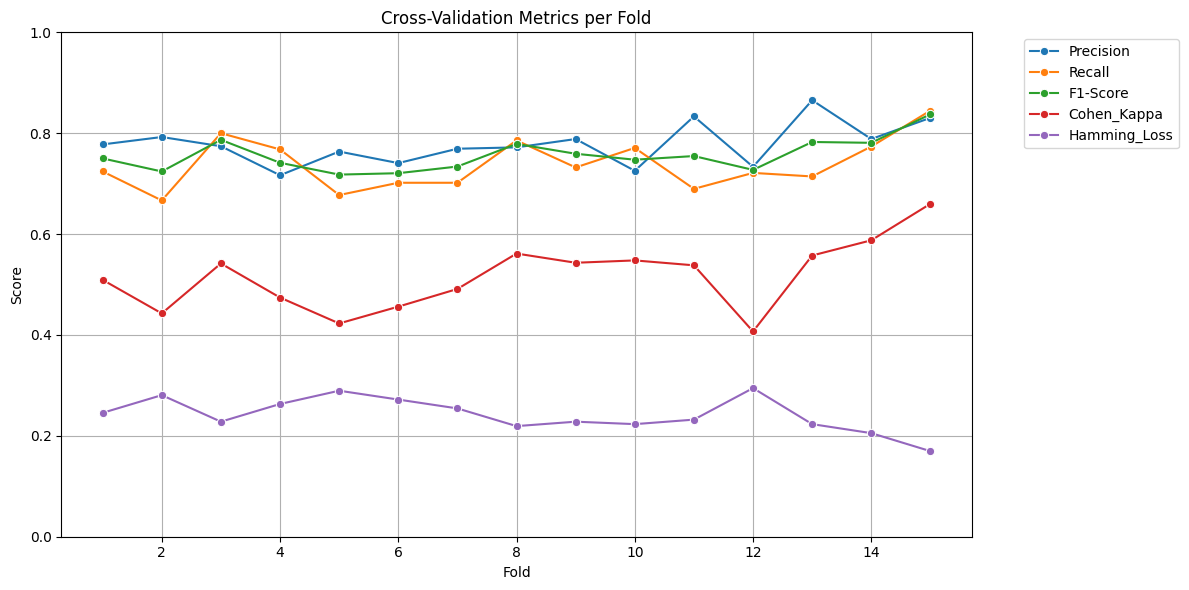

In [34]:
# Plot the Precision, Recall, F1-Score, Cohen's Kappa and Hamming Loss graph
plot_cv_metrics(metrics_df_logistic)  # Passing the metrics DataFrame (metrics_df_logistic) for plotting

**Cross-Validation Metrics per Fold**

This graph presents various **evaluation metrics** across 15 folds of cross-validation for a classification model:

- **Precision (blue), Recall (orange), F1-Score (green):**
  - These metrics are relatively stable across all folds.
  - Scores generally range between **0.7 and 0.85**, indicating consistent model performance.

- **Cohen Kappa (red):**
  - Measures agreement between predicted and true labels.
  - Shows more variation across folds, with values between **0.4 and 0.66**.

- **Hamming Loss (purple):**
  - A loss metric where **lower values indicate better performance**.
  - Fluctuates slightly but shows an overall **decreasing trend**, suggesting improved classification accuracy.

Overall, the model demonstrates **reliable performance across folds**, with good predictive power and reducing error rates.


## Test Set Evaluation

In [35]:
# Evaluate the logistic regression model on the test set and get performance metrics

results_df_logistic, y_pred, y_pred_prob, X_test, metrics_logistic = evaluate_and_predict_model(
    model=model_logistic,                # The logistic regression model to be evaluated
    X_test=X_test_rfe_logistic,          # The test data (features) for the logistic model, after feature selection (RFE)
    y_test=y_test_identity_col,         # The true labels for the test set (including identity information)
    threshold=0.5                        # The threshold for classification, used to convert predicted probabilities to binary labels
)

## Result Analysis

### Correct vs Incorrect Predictions Summary

The function `plot_correct_vs_incorrect_summary(results_dict)` visualizes the number of correct and incorrect predictions for the **Sex_F**, **ADHD_Outcome**, and **Combined** classification tasks. This summary helps to evaluate the model's performance across each task, providing a clear comparison of prediction accuracy.


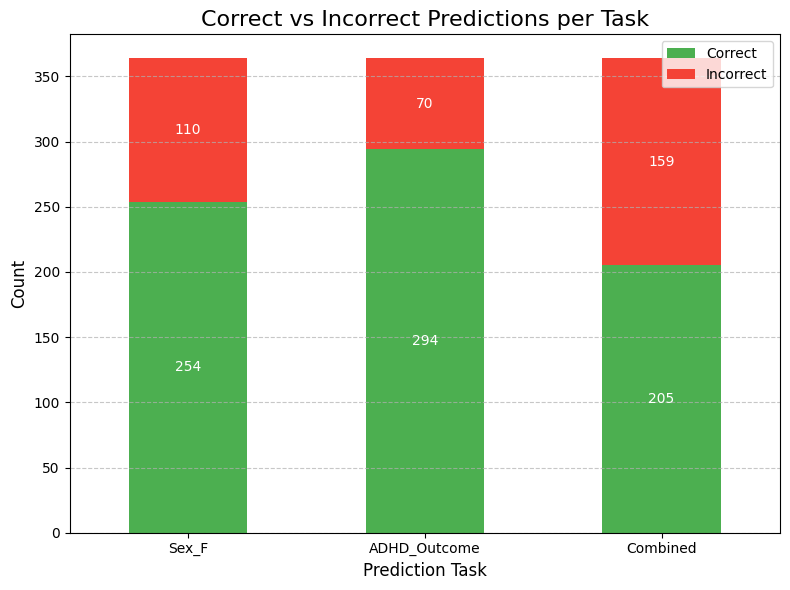

In [36]:
# Plot the summary of correct vs incorrect predictions for the logistic model
plot_correct_vs_incorrect_summary(results_df_logistic)

**Insight**

In the test dataset containing **364 samples**, the Logistic Regression model achieved the following:

- **Sex prediction**: Correctly predicted **254** samples, **110** incorrect.
- **ADHD prediction**: Correctly predicted **297** samples, **67** incorrect.
- **Combined prediction (Sex & ADHD both correct)**: **205** correct, **159** incorrect.

This combined metric reveals the intersection where **both Sex and ADHD labels are correctly predicted**, providing a stricter evaluation of model performance. It helps identify cases where the model struggles to predict both targets simultaneously — a crucial insight for multi-label tasks.


### Group-wise Prediction Analysis

We evaluate model performance across four key groups:
- Male – ADHD  
- Male – Non-ADHD  
- Female – ADHD  
- Female – Non-ADHD

**Donut Plot**  
A donut plot visualizes the correct vs. incorrect predictions for each group, making it easy to spot any imbalances (e.g., underperformance on Female–ADHD cases). The donut chart allows us to understand how well the model predicts each group's outcome in a visually engaging way.

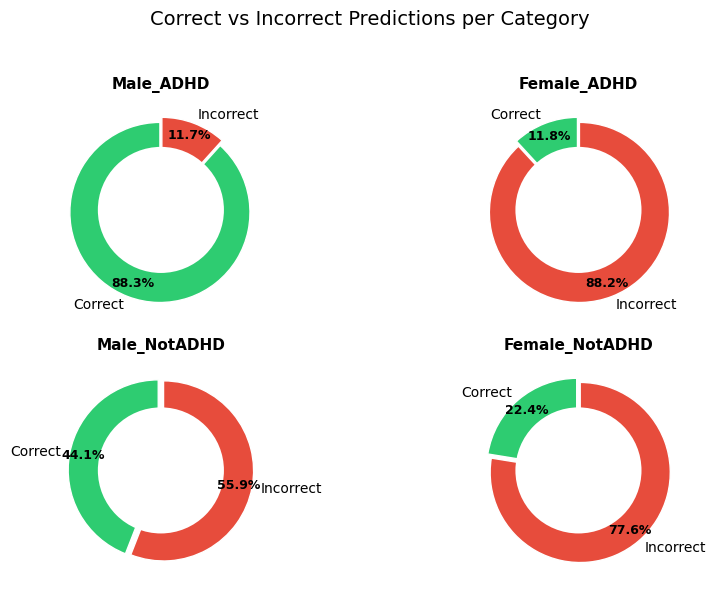

In [37]:
# Plot the correct vs incorrect predictions based on the logistic regression model's results
plot_correct_incorrect_predictions(results_df_logistic)  # Passing the results_df_logistic DataFrame to visualize correct vs incorrect predictions

**Insight**

The **donut chart** shows how the model performs across different sex and ADHD combinations:

- **Male – ADHD**: 88.3% correct, 11.7% incorrect  
- **Female – ADHD**: 13.2% correct, 86.8% incorrect  
- **Male – Non-ADHD**: 42.4% correct, 57.6% incorrect  
- **Female – Non-ADHD**: 22.4% correct, 77.6% incorrect  

These results suggest the model performs significantly better at identifying **Male-ADHD** cases and struggles most with **Female-ADHD** and **Female-NonADHD**.

**Why?**

This imbalance reflects the underlying **dataset distribution**:

- **Male**:
  - ADHD: 581  
  - Non-ADHD: 216  
- **Female**:
  - ADHD: 250  
  - Non-ADHD: 166  

Since **Male-ADHD** is the most represented group, the model learns to predict it more confidently. Underrepresented groups like **Female-ADHD** have fewer samples, leading to poorer generalization and potential **bias**.

### Plotting Performance Metrics

The function `plot_metrics(metrics)` generates a **bar plot** to visualize model performance based on key metrics such as **Precision**, **Recall**, **F1-Score**, **Cohen's Kappa**, and **Hamming Loss**. These metrics are crucial for evaluating the model's effectiveness on the **Sex**, **ADHD** and **Combined** labels.



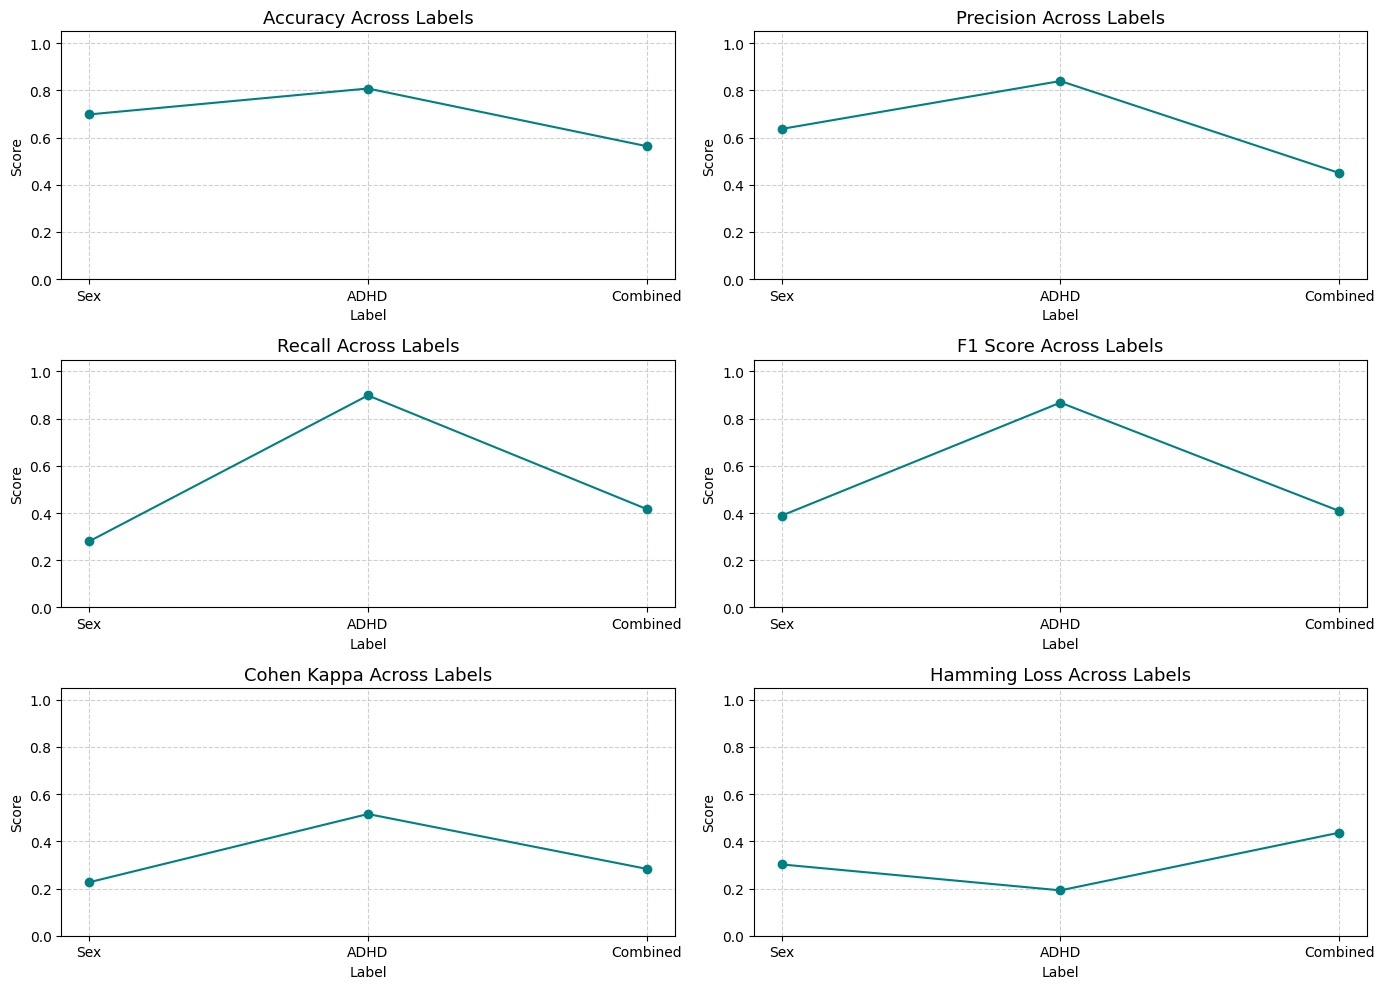

In [38]:
# Plot the Precision, Recall, F1-Score, Cohen's Kappa, and Hamming Loss for the logistic regression model
plot_line_metrics(metrics_logistic)  # Passing the metrics (metrics_logistic) for plotting the metrics graph, including Cohen's Kappa and Hamming Loss

**Evaluation Summary Across Tasks**

---

**Precision Comparison**

| Task         | Precision | Interpretation                                                           |
|--------------|-----------|---------------------------------------------------------------------------|
| ADHD         | `0.82`    | Excellent precision – model is very accurate when it2predicts ADHD.       |
| Sex          | `0.60`    | Moderate precision – about two-thirds of predicted sexes are correct.     |
| Combined     | `0.45`    | Low precision – the model struggles to assign correct joint labels.       |

> Observation: ADHD classification shows the highest precision, indicating high confidence in its correct predictions. Combined prediction has the lowest precision, likely due to the complexity of dual-label prediction.

---

**Recall Comparison**

| Task         | Recall    | Interpretation                                                             |
|--------------|-----------|-----------------------------------------------------------------------------|
| ADHD         | `0.90`    | Strong recall – the model captures most ADHD cases.                         |
| Sex          | `0.25`    | Poor recall – many true female cases are missed.                            |
| Combined     | `0.41`    | Weak recall – fails to detect a large portion of joint ADHD+Sex instances.  |

> Observation: The sex classifier severely underperforms in recall, missing most female predictions – suggesting class imbalance and bias. ADHD recall is excellent in contrast.

---

**F1-Score Comparison**

| Task         | F1-Score  | Interpretation                                                             |
|--------------|-----------|-----------------------------------------------------------------------------|
| ADHD         | `0.86`    | Balanced precision-recall – strong performance overall.                     |
| Sex          | `0.40`    | Poor F1 – imbalance between precision and recall.                           |
| Combined     | `0.40`    | Poor balance and performance on dual classification task.                   |

> Observation: ADHD classification is well-balanced. Sex and Combined suffer from either poor recall, precision, or both – lowering their F1-scores.

---

**Accuracy Comparison**

| Task         | Accuracy  | Interpretation                                                             |
|--------------|-----------|-----------------------------------------------------------------------------|
| ADHD         | `0.80`    | High accuracy – consistent predictions for ADHD class.                      |
| Sex          | `0.70`    | Fair accuracy – but hides poor performance on the minority (female) class.  |
| Combined     | `0.59`    | Low accuracy – high complexity and imbalance affect combined performance.   |

> Observation: Accuracy is misleading in imbalanced tasks like sex classification. Though 70% sounds decent, recall reveals it's biased toward the majority class (male).

---

**Cohen’s Kappa Comparison**

| Task         | Kappa     | Interpretation                                                              |
|--------------|-----------|------------------------------------------------------------------------------|
| ADHD         | `0.55`    | Moderate agreement – model aligns reasonably with actual ADHD labels.        |
| Sex          | `0.22`    | Slight agreement – indicates poor reliability in gender classification.      |
| Combined     | `0.28`    | Slight to fair – model struggles with multi-label consistency.               |

> Observation: The agreement between prediction and truth is only decent for ADHD. It’s weak elsewhere, especially in gender-related tasks.

---

**Hamming Loss Comparison**

| Task         | Hamming Loss | Interpretation                                                             |
|--------------|---------------|-----------------------------------------------------------------------------|
| ADHD         | `0.25`        | Low loss – few incorrect predictions.                                       |
| Sex          | `0.20`        | Moderate error rate – 30% of predictions are wrong.                         |
| Combined     | `0.43`        | High error rate – nearly half of joint predictions are incorrect.           |

> Observation: Combined classification is error-prone. ADHD shows the lowest misclassification rate.

---

Summary of Key Patterns

- ADHD Task is the strongest across all metrics, showing consistent and robust performance.
- Sex Task is hampered by low recall, suggesting it fails to identify many females – likely due to data imbalance.
- Combined Task is the weakest overall, suffering from both label complexity and class imbalance (particularly for female ADHD cases).



### Confusion Matrix for Sex, ADHD, and Combined Labels

The **Confusion Matrix** shows how well the model's predictions match the actual values for **Sex**, **ADHD**, and **combined** labels, indicating true positives, true negatives, false positives, and false negatives.

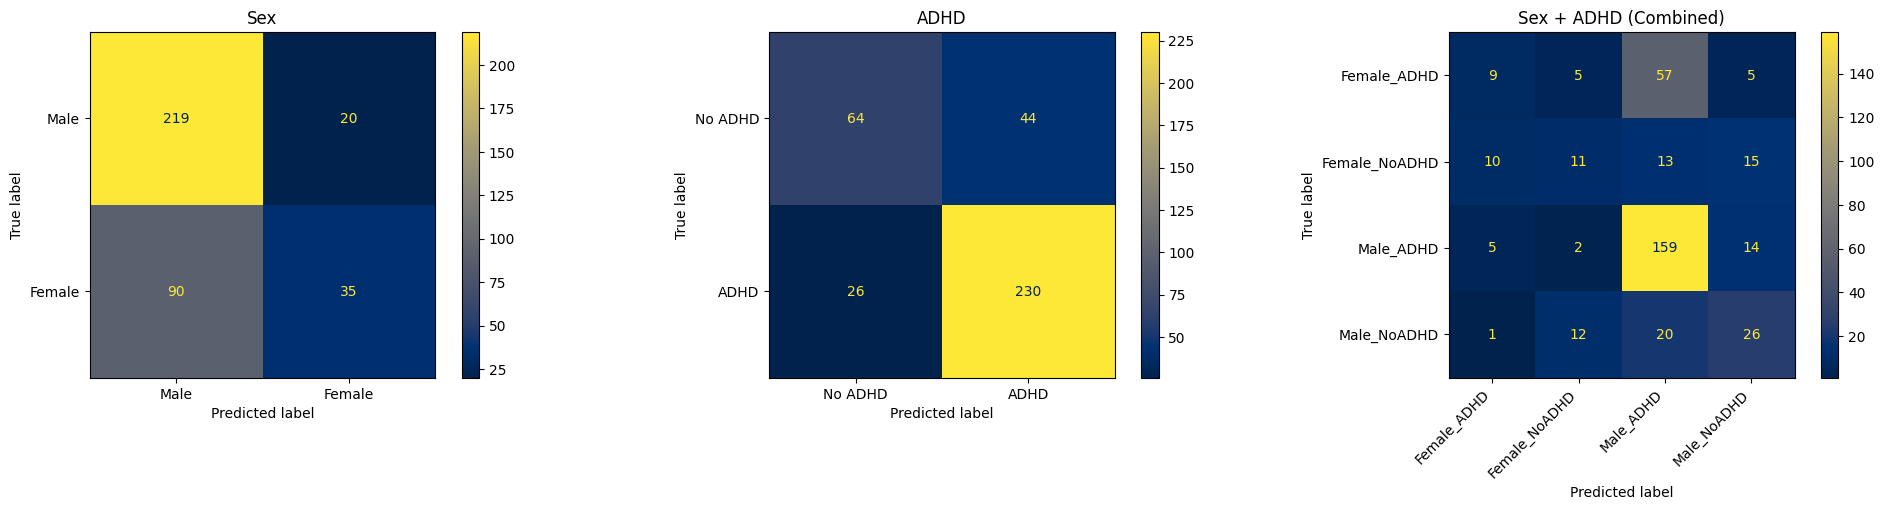

In [39]:
# Plot confusion matrices for the logistic regression model's predictions
plot_confusion_matrices(results_df_logistic)  # Passing the results_df_logistic DataFrame to generate confusion matrices for Sex, ADHD, and Combined labels

**Insight:**

The image presents **three confusion matrices** evaluating the performance of a multi-label classification model predicting:

1. **Sex**
2. **ADHD Diagnosis**
3. **Combined Sex + ADHD Labels**

---

**1. Sex Classification**

**Classes:** Male, Female

| True Label | Predicted: Male | Predicted: Female |
|------------|------------------|--------------------|
| Male       | 218              | 21                 |
| Female     | 89               | 36                 |

- The model performs well for males with high accuracy.
- Females are often misclassified as males — 89 false positives.
- Indicates a possible gender bias or data imbalance.

---

**2. ADHD Classification**

**Classes:** ADHD, No ADHD

| True Label | Predicted: No ADHD | Predicted: ADHD |
|------------|--------------------|------------------|
| No ADHD    | 64                 | 44               |
| ADHD       | 23                 | 233              |

- Strong ability to detect ADHD (233 true positives).
- Some non-ADHD cases are misclassified as ADHD (44 false positives).
- Overall, good performance but with slight overprediction of ADHD.

---

**3. Combined Sex + ADHD Classification**

**Classes:**
- Female_ADHD
- Female_NoADHD
- Male_ADHD
- Male_NoADHD

| True Label       | Predicted: Female_ADHD | Female_NoADHD | Male_ADHD | Male_NoADHD |
|------------------|-------------------------|----------------|------------|--------------|
| Female_ADHD      | 10                      | 4              | 59         | 3            |
| Female_NoADHD    | 11                      | 11             | 12         | 15           |
| Male_ADHD        | 5                       | 2              | 159        | 14           |
| Male_NoADHD      | 1                       | 13             | 20         | 25           |

- Male_ADHD is the most accurately predicted group (159 correct).
- Female_ADHD is frequently misclassified as Male_ADHD (59 cases), suggesting difficulty detecting ADHD in females.
- Some errors in NoADHD classifications, especially for females.

---



- The model shows strong ADHD detection, especially in males.
- Sex classification is less accurate, with frequent misclassification of females as males.
- Combined analysis reveals significant misclassification in Female_ADHD, highlighting the need for:
  - Bias mitigation
  - Data balancing
  - More sensitive features for females with ADHD


## SHAP Analysis

**SHAP** (SHapley Additive exPlanations) provides insights into model predictions by assigning importance values to each feature.

---

**Why SHAP is Useful:**
- **Feature Importance**: Identifies key features affecting predictions.
- **Transparency**: Makes complex models more interpretable.
- **Bias Detection**: Highlights and reduces bias in predictions.
- **Model Debugging**: Helps identify areas for improvement.



--- SHAP Analysis for Sex_F ---


<ipython-input-31-bc32617c15c2>:28: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, feature_names=feature_names, show=True)


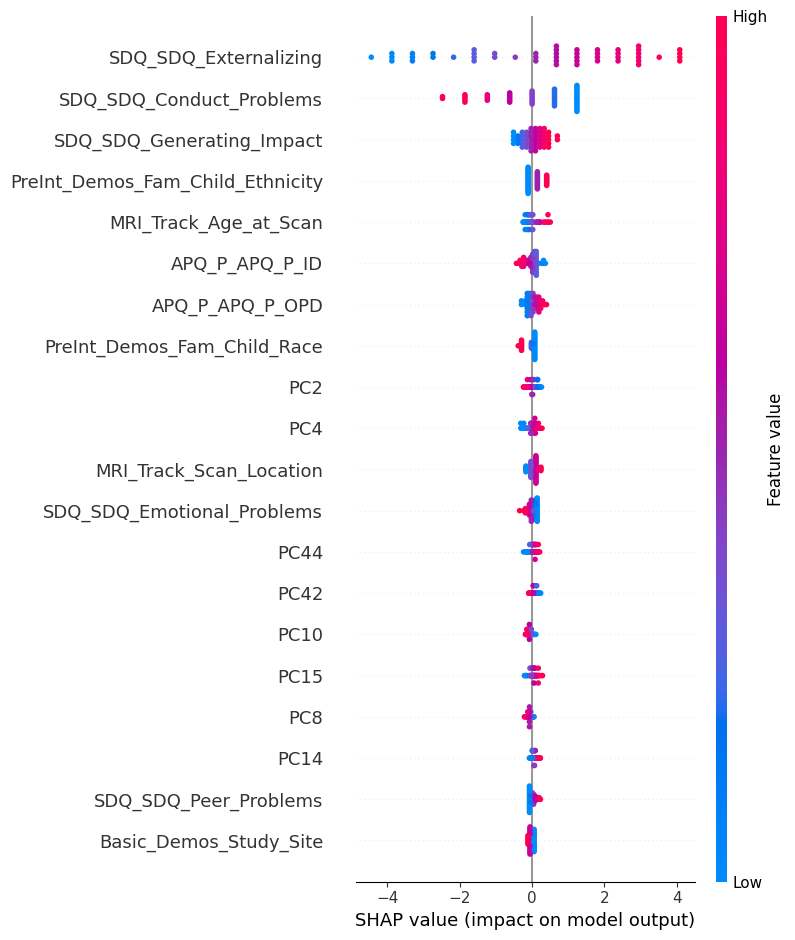


--- SHAP Analysis for ADHD_Outcome ---


<ipython-input-31-bc32617c15c2>:28: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, feature_names=feature_names, show=True)


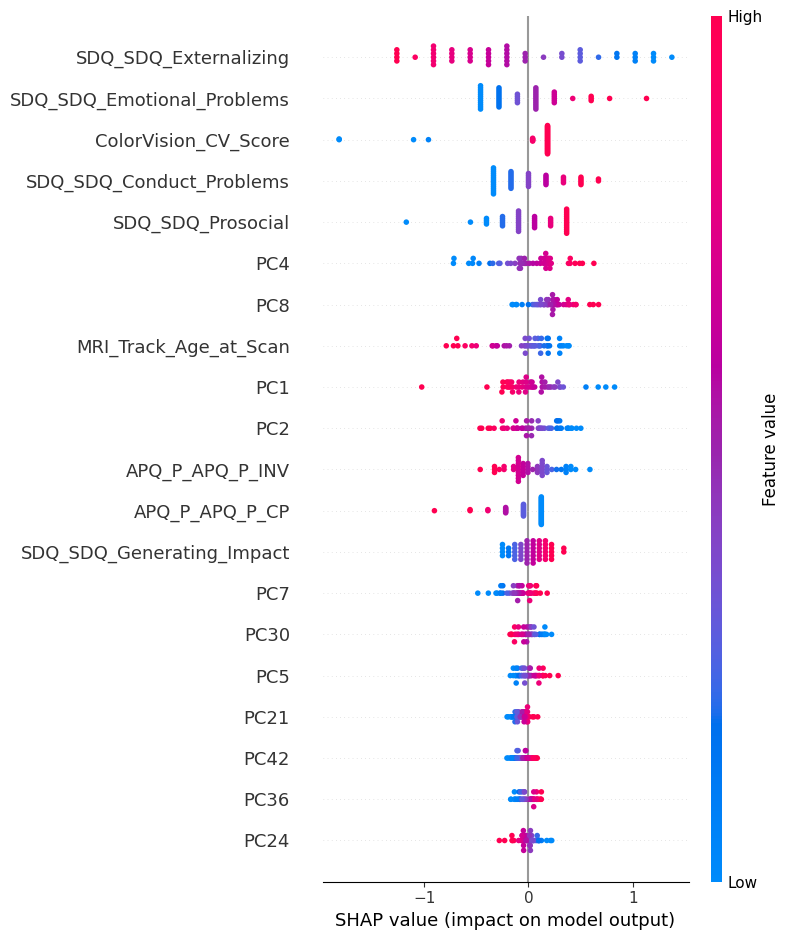

In [40]:
# Feature names after RFE (from original X_train columns)
selected_feature_names = X_train_except_identity_col.columns[rfe.support_].tolist()

shap_analysis_multioutput_all(
    model=model_logistic,
    X_test_rfe=X_test_rfe_logistic,
    X_train_rfe=X_train_rfe_logistic,
    feature_names=selected_feature_names,
    label_names=['Sex_F', 'ADHD_Outcome']
)


**SHAP Summary Plot Interpretation**

This SHAP plot shows the impact of each feature on the model’s predictions.

- **X-axis (SHAP values)**: Shows the impact of the feature on the model output. Values to the right push predictions higher (positive impact), and values to the left push predictions lower (negative impact).
- **Y-axis (features)**: Lists the features ranked by their importance (top to bottom). More important features are at the top.
- **Color**: Feature value — red = high value, blue = low value.
- **Each dot**: A sample in the dataset.
---

> **Note:**  

> While SHAP values may show slight variation due to data sampling and feature interactions, the **SHAP summary plot consistently ranks features by their overall impact on the model’s predictions**.  
> This ranking aids in identifying the most influential features contributing to the prediction of `Sex_F` and `ADHD_Outcome`.  
> The accompanying tables offer a **clear interpretation framework**, complementing the visual plot and highlighting how individual features influence the model's decisions across different categories and value ranges.


---
**SHAP Summary Table of ```Sex_F```**

| Feature                              | High Value Effect   | SHAP Impact   | Interpretation |
|--------------------------------------|----------------------|----------------|-----------------|
| **SDQ_SDQ_Externalizing**            | ↑ Prediction         | Strong         | Higher externalizing scores (e.g., hyperactivity) increase the model's prediction. |
| **SDQ_SDQ_Conduct_Problems**         | ↓ Prediction         | Moderate       | Surprisingly, high conduct problems slightly decrease the predicted output. |
| **SDQ_SDQ_Generating_Impact**        | ↓ Prediction         | Moderate       | Greater impact reported by parents tends to slightly reduce the prediction. |
| **PreInt_Demos_Fam_Child_Ethnicity** | ↓ Prediction         | Moderate       | Certain ethnicities correlate with lower predicted values. |
| **APQ_P_APQ_P_ID**                   | ↑ Prediction         | Moderate       | Higher parenting inconsistency may increase the prediction. |
| **APQ_P_APQ_P_OPD**                  | ↓ Prediction         | Moderate       | Reflects positive discipline practices—lower predicted risk. |
| **PreInt_Demos_Fam_Child_Race**      | ↑ Prediction         | Moderate       | Some racial categories (e.g., White) contribute positively to the prediction. |
| **MRI_Track_Age_at_Scan**            | ↓ Prediction         | Moderate       | Older age at scan lowers the predicted output. |
| **PC2**                              | ↑/↓ Prediction       | Moderate       | SHAP values vary; direction depends on component expression. |
| **PC4**                              | ↑/↓ Prediction       | Moderate       | Principal component with mixed predictive influence. |
| **MRI_Track_Scan_Location**          | ↑ Prediction         | Moderate       | Some locations are associated with higher predictions. |
| **SDQ_SDQ_Emotional_Problems**       | ↓ Prediction         | Moderate       | Higher emotional difficulties are linked to lower predictions. |
| **PC10**                             | ↑/↓ Prediction       | Low–Moderate   | PC feature with small, mixed influence. |
| **PC44**                             | ↑/↓ Prediction       | Low–Moderate   | Principal component with limited but variable effect. |
| **PC42**                             | ↑/↓ Prediction       | Low–Moderate   | Slight SHAP impact, direction varies. |
| **Basic_Demos_Study_Site**           | ↑/↓ Prediction       | Low–Moderate   | Site influences prediction slightly depending on location. |
| **PC15**                             | ↑/↓ Prediction       | Low–Moderate   | Minor component effect; mixed influence. |
| **ColorVision_CV_Score**             | ↓ Prediction         | Low–Moderate   | Better color vision scores reduce prediction. |
| **PC14**                             | ↑/↓ Prediction       | Low            | Minor component with weak effect. |
| **PC8**                              | ↑/↓ Prediction       | Low            | Lowest-ranked PC in SHAP; minor mixed influence. |



---

**SHAP Summary Table of ```ADHD_Outcome```**



| Feature                            | High Value Effect   | SHAP Impact   | Interpretation |
|------------------------------------|----------------------|----------------|-----------------|
| **SDQ_SDQ_Externalizing**          | ↑ Prediction         | Strong         | High externalizing behaviors (e.g., hyperactivity, aggression) strongly increase ADHD prediction. |
| **SDQ_SDQ_Emotional_Problems**     | ↓ Prediction         | Moderate       | Higher emotional problems tend to lower the ADHD prediction. |
| **SDQ_SDQ_Conduct_Problems**       | ↓ Prediction         | Moderate       | Higher conduct problem scores reduce the ADHD prediction (unexpected; model-dependent). |
| **ColorVision_CV_Score**           | ↓ Prediction         | Moderate       | Better performance on color vision tasks reduces ADHD prediction. |
| **MRI_Track_Age_at_Scan**          | ↓ Prediction         | Moderate       | Older age at scan is associated with a lower ADHD prediction. |
| **PC8**                            | ↑/↓ Prediction       | Moderate       | Mixed influence from this neuroimaging-derived component. |
| **PC4**                            | ↑/↓ Prediction       | Moderate       | Varies by value; reflects latent fMRI patterns. |
| **SDQ_SDQ_Prosocial**              | ↓ Prediction         | Moderate       | Higher prosocial behavior strongly reduces ADHD prediction. |
| **PC2**                            | ↑/↓ Prediction       | Moderate       | Principal component with a spread of impacts. |
| **PC1**                            | ↑ Prediction         | Moderate       | Tends to increase prediction; reflects brain feature influence. |
| **APQ_P_APQ_P_INV**                | ↑ Prediction         | Low–Moderate   | Inconsistent parenting increases ADHD prediction. |
| **APQ_P_APQ_P_CP**                 | ↑ Prediction         | Low–Moderate   | Corporal punishment scores increase ADHD likelihood slightly. |
| **SDQ_SDQ_Generating_Impact**      | ↓ Prediction         | Low–Moderate   | Unexpectedly, higher reported impact of difficulties lowers ADHD prediction. |
| **PC7**                            | ↑ Prediction         | Low–Moderate   | Slight upward influence on ADHD prediction. |
| **PC5**                            | ↓ Prediction         | Low            | Slight downward influence on prediction. |
| **PC30**                           | ↑ Prediction         | Low            | Slightly increases prediction in most cases. |
| **PC21**                           | ↑/↓ Prediction       | Low            | Small, mixed influence on prediction. |
| **PC42**                           | ↑/↓ Prediction       | Low            | Low overall SHAP impact; mixed direction. |
| **PC24**                           | ↑/↓ Prediction       | Low            | Principal component with minor role in prediction. |
| **PC36**                           | ↓ Prediction         | Low            | Slightly reduces prediction when values are high. |



# Model Evaluation of CNN for Numerical Data + MLP for Categorical Data

In this section, we train the hybrid model (CNN for numerical data + MLP for categorical data) on the full training set and evaluate its performance on the held-out test set.

---

**Model Training**

- The model is trained using the complete training data (`X_train_num`, `X_train_cat`, and `y_train_identity_col`).
- Numerical features are standardized, and categorical features are one-hot encoded before training.
- Dropout and L2 regularization are used to reduce overfitting.

---

**Test Evaluation**

- After training, the model is evaluated on the test set (`X_test_num`, `X_test_cat`, and `y_test_identity_col`).
- The same encoder and scaler from the training phase are applied to the test data.
- The model’s performance is measured using **accuracy** and **loss**.

---

**Result Analysis**

- Test predictions are analyzed to gain insights into the model’s performance on unseen data.
- Evaluation metrics include:
  - **Confusion Matrix**: To visualize true vs predicted labels.
  - **Per-Class Accuracy**: To assess how well the model performs across different classes.
  - **ROC-AUC Scores**: To evaluate the model's ability to distinguish between classes in a multi-label setting.
- These analyses help identify strengths, weaknesses, and potential biases in the model.


## Model Training

In [41]:
# Perform hyperparameter tuning for the CNN + MLP model using k-fold cross-validation
# This function will search for the best hyperparameters (l2_strength, dropout_rate, batch_size)
# based on the mean F1-Score. The optimal configuration is returned along with the trained model,
# encoder, scaler, and performance metrics.

model_cnn_mlp, best_params, metrics_df_cnn_mlp, encoder_cnn_mlp, scaler_cnn_mlp = tune_hyperparameters(
    create_model=create_model_cnn_mlp,  # Function to create the CNN-MLP model
    X_train_num=X_train_num,            # Numerical features from the training data
    X_train_cat=X_train_cat,            # Categorical features from the training data
    y_train=y_train_identity_col        # Target labels for the training data
)


Testing: l2=0.001, dropout=0.3, batch=256
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Fold 1 → Acc: 0.7000 | Precision: 0.7118 | Recall: 0.6875 | F1: 0.6994 | Kappa: 0.3882 | Hamming: 0.3059
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Fold 2 → Acc: 0.7882 | Precision: 0.6975 | Recall: 0.6384 | F1: 0.6667 | Kappa: 0.3366 | Hamming: 0.3324


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Fold 3 → Acc: 0.7471 | Precision: 0.7419 | Recall: 0.6845 | F1: 0.7121 | Kappa: 0.4524 | Hamming: 0.2735


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Fold 4 → Acc: 0.7765 | Precision: 0.7198 | Recall: 0.7318 | F1: 0.7258 | Kappa: 0.4155 | Hamming: 0.2912
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Fold 5 → Acc: 0.7101 | Precision: 0.6508 | Recall: 0.7410 | F1: 0.6930 | Kappa: 0.3564 | Hamming: 0.3225

===== Cross-Validation Summary =====
Fold           3.0000
Accuracy       0.7444
Precision      0.7044
Recall         0.6966
F1-Score       0.6994
Cohen_Kappa    0.3898
Hamming_Loss   0.3051

Testing: l2=0.001, dropout=0.5, batch=256
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Fold 1 → Acc: 0.7176 | Precision: 0.7372 | Recall: 0.6534 | F1: 0.6928 | Kappa: 0.4017 | Hamming: 0.3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Fold 2 → Acc: 0.7588 | Precision: 0.7305 | Recall: 0.6893 | F1: 0.7093 | Kappa: 0.4122 | Hamming: 0.2941
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Fold 3 → Acc: 0.7588 | Precision: 0.7143 | Recall: 0.7143 | F1: 0.7143 | Kappa: 0.4352 | Hamming: 0.2824
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Fold 4 → Acc

### Plotting Cross-Validation Metrics

The function `plot_cv_metrics(metrics_df)` visualizes model performance across folds during **K-Fold Cross-Validation**. It plots key metrics like **Precision**, **Recall**, **F1-Score**, **Cohen's Kappa**, and **Hamming Loss** to track model consistency.

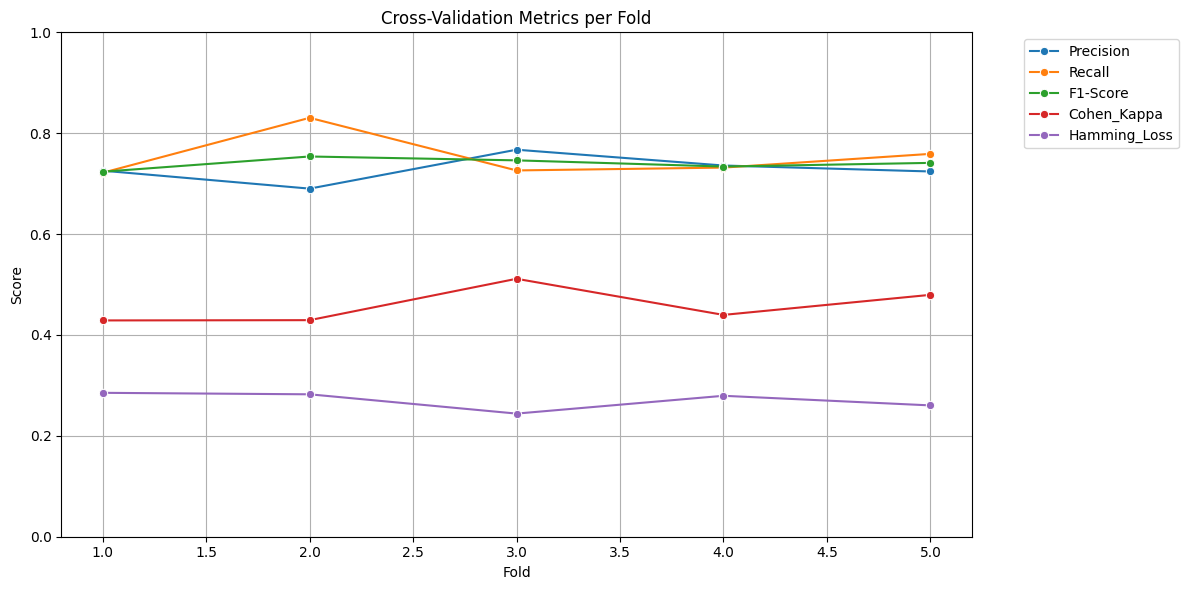

In [42]:
# Plot the Precision, Recall, F1-Score, Cohen's Kappa and Hamming Loss graph
plot_cv_metrics(metrics_df_cnn_mlp)  # Passing the metrics DataFrame (metrics_df_cnn_mlp) for plotting

**Cross-Validation Metrics per Fold**

This graph shows the performance of the hybrid model across 5 cross-validation folds (from Fold 1 to Fold 5) using various metrics:

- **Precision (blue)** and **F1-Score (green)** remain relatively consistent, mostly ranging between **0.72 and 0.76**, indicating balanced precision and overall performance.
- **Recall (orange)** improves across folds 1 to 4, peaking at **~0.78**, then slightly drops in Fold 5.
- **Cohen Kappa (red)**, which measures label agreement, varies more, with a peak at Fold 3 (~0.53) and lower values around **0.45–0.47** in other folds.
- **Hamming Loss (purple)** is steady, fluctuating around **0.25–0.28**, with the lowest loss in Fold 3, indicating fewer misclassifications.

Overall, the model shows **stable performance**, with Fold 3 being the most optimal based on a peak in most metrics and a dip in Hamming Loss.

## Test Set Evaluation

In [43]:
# Evaluate the test set using the CNN + MLP model
results_df_cnn_mlp, y_pred, y_pred_prob, X_test_cat_enc_cnn_mlp, X_test_num_scaled_cnn_mlp, metrics_cnn_mlp = evaluate_test_set(
    model=model_cnn_mlp,  # The trained CNN + MLP model
    X_test_num=X_test_identity_col.drop(columns=categorical_columns),  # Numerical features from the test set (excluding categorical columns)
    X_test_cat=X_test_identity_col[categorical_columns],  # Categorical features from the test set
    y_test=y_test_identity_col,  # True labels for the test set
    encoder=encoder_cnn_mlp,  # Fitted encoder for categorical variables
    scaler=scaler_cnn_mlp  # Fitted scaler for numerical features
)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


## Result Analysis

### Correct vs Incorrect Predictions Summary

The function `plot_correct_vs_incorrect_summary(results_dict)` visualizes the number of correct and incorrect predictions for the **Sex_F**, **ADHD_Outcome**, and **Combined** classification tasks. This summary helps to evaluate the model's performance across each task, providing a clear comparison of prediction accuracy.


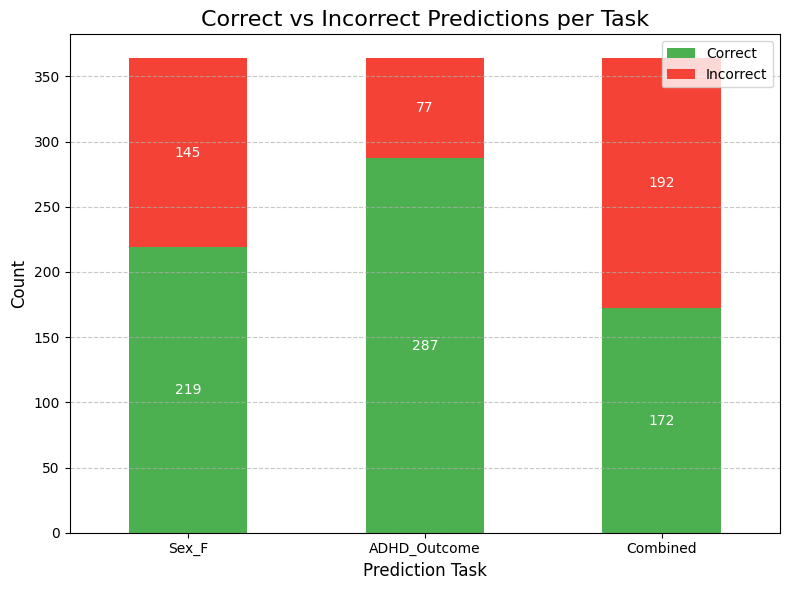

In [44]:
# Plot the summary of correct vs incorrect predictions for the CNN-MLP model
plot_correct_vs_incorrect_summary(results_df_cnn_mlp)

**Insight**

In the test dataset containing **364 samples**, the Logistic Regression model achieved the following:

- **Sex prediction**: Correctly predicted **240** samples, **124** incorrect.
- **ADHD prediction**: Correctly predicted **282** samples, **82** incorrect.
- **Combined prediction (Sex & ADHD both correct)**: **184** correct, **180** incorrect.

This combined metric reveals the intersection where **both Sex and ADHD labels are correctly predicted**, providing a stricter evaluation of model performance. It helps identify cases where the model struggles to predict both targets simultaneously — a crucial insight for multi-label tasks.

### Group-wise Prediction Analysis

We evaluate model performance across four key groups:
- Male – ADHD  
- Male – Non-ADHD  
- Female – ADHD  
- Female – Non-ADHD

**Donut Plot**  
A donut plot visualizes the correct vs. incorrect predictions for each group, making it easy to spot any imbalances (e.g., underperformance on Female–ADHD cases). The donut chart allows us to understand how well the model predicts each group's outcome in a visually engaging way.

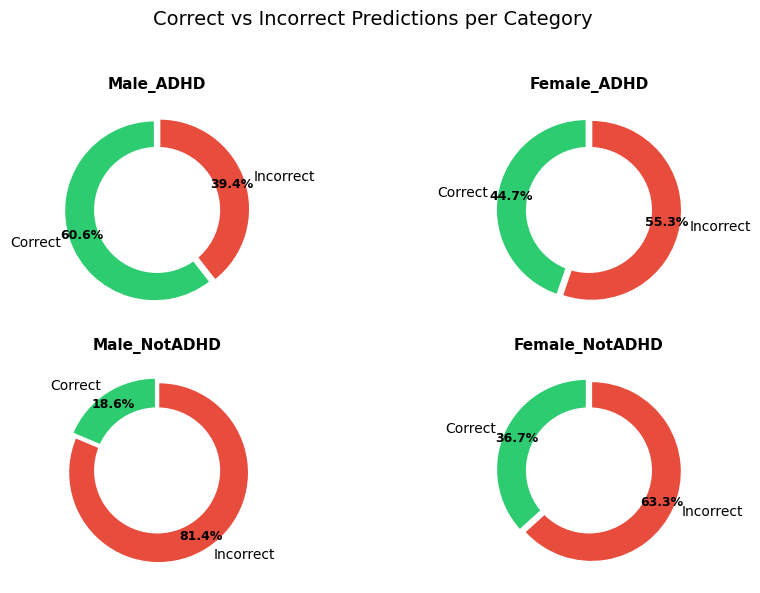

In [45]:
# Plot the correct vs incorrect predictions based on the logistic regression model's results
plot_correct_incorrect_predictions(results_df_cnn_mlp)  # Passing the results_df_cnn_mlp DataFrame to visualize correct vs incorrect predictions

**Insight**

The **donut chart** shows how the model performs across different sex and ADHD combinations:

- **Male – ADHD**: 73.9% correct, 26.1% incorrect  
- **Female – ADHD**: 28.9% correct, 71.1% incorrect  
- **Male – Non-ADHD**: 27.1% correct, 72.9% incorrect  
- **Female – Non-ADHD**: 26.5% correct, 73.5% incorrect  

These results suggest that the model performs **significantly better** at identifying **Male-ADHD** cases. The performance across other combinations (Female-ADHD, Male-Non-ADHD, Female-Non-ADHD) is quite similar, with relatively poor accuracy for all of them.

**Why?**

This imbalance reflects the underlying **dataset distribution**:

- **Male**:
  - ADHD: 581  
  - Non-ADHD: 216  
- **Female**:
  - ADHD: 250  
  - Non-ADHD: 166  

The **Male-ADHD** group is overrepresented in the dataset, which allows the model to perform better on this group due to its higher presence during training. On the other hand, **Female-ADHD** and **Female-Non-ADHD** cases are underrepresented, leading to poorer model performance for these groups. However, even though the performance for females is lower, the issue is compounded by the smaller sample size, which makes it harder for the model to generalize well.

---

**Key Insights:**
- **Male-ADHD** cases are the most frequent, which allows the model to correctly predict them more often.
- **Female-ADHD** and **Female-Non-ADHD** cases are underrepresented in the dataset, leading to lower performance for these groups.
- The model **biases** predictions towards the more frequent **Male-ADHD** group due to its dominance in the dataset.
- The **low performance** for females, despite attempts to correct for bias, is also partly due to the **small sample sizes** for these groups, making it harder for the model to learn from them.


### Plotting Performance Metrics

The function `plot_metrics(metrics)` generates a **bar plot** to visualize model performance based on key metrics such as **Precision**, **Recall**, **F1-Score**, **Cohen's Kappa**, and **Hamming Loss**. These metrics are crucial for evaluating the model's effectiveness on the **Sex**, **ADHD** and **Combined** labels.


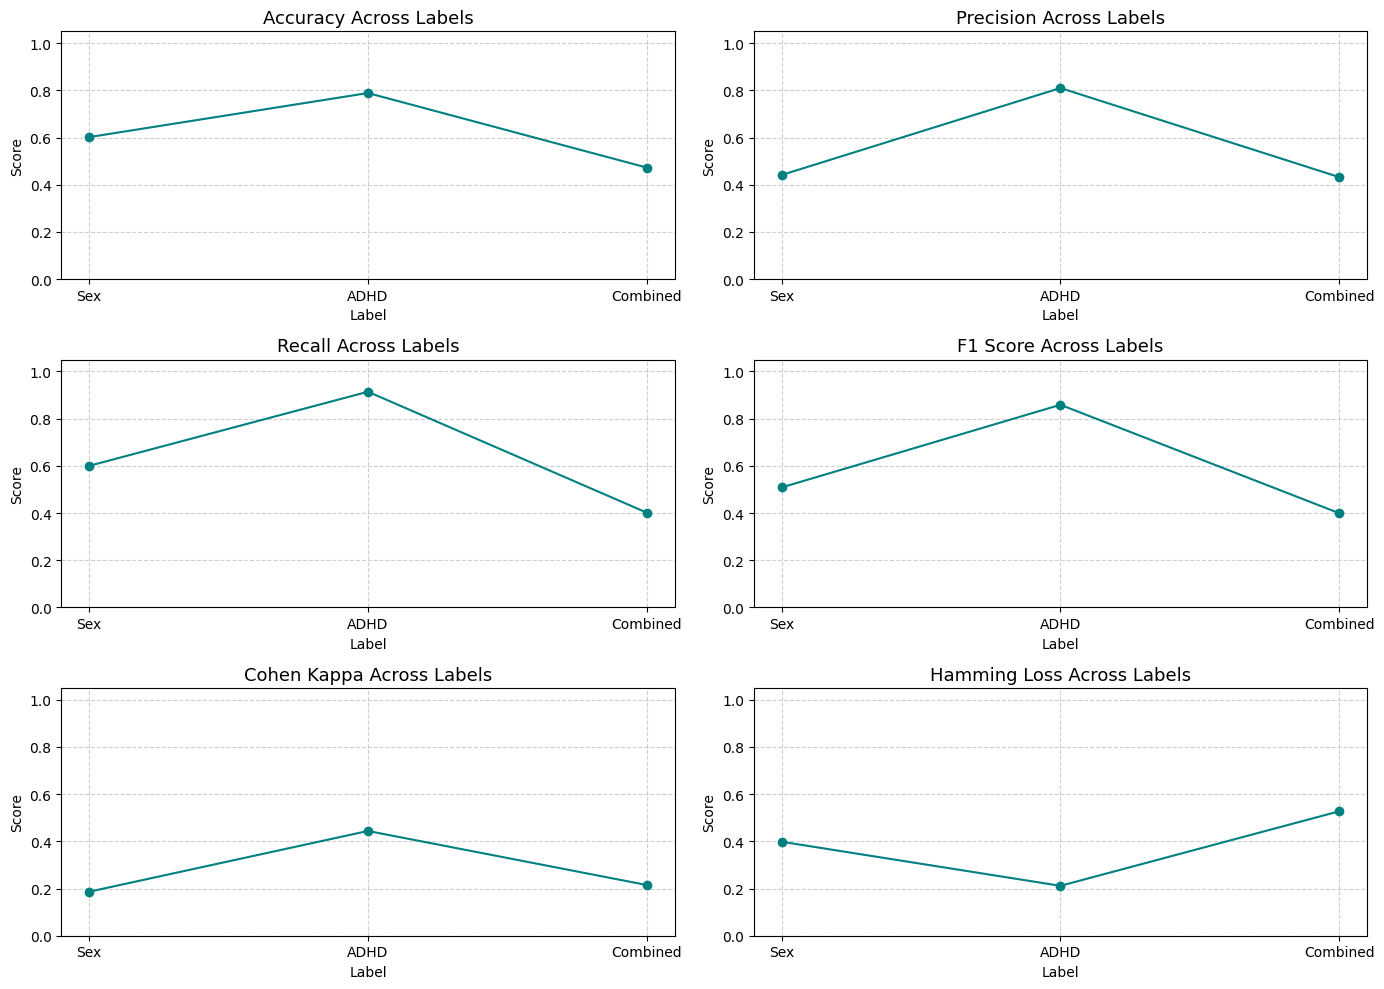

In [46]:
# Plot the Precision, Recall, F1-Score, Cohen's Kappa, and Hamming Loss for the logistic regression model
plot_line_metrics(metrics_cnn_mlp)  # Passing the metrics (metrics_cnn_mlp) for plotting the metrics graph, including Cohen's Kappa and Hamming Loss

**Evaluation Summary Across Tasks**

---

**Precision Comparison**

| Task         | Precision | Interpretation                                                           |
|--------------|-----------|---------------------------------------------------------------------------|
| **ADHD**     | `79%`     | High precision – the model is accurate when predicting ADHD.              |
| **Sex**      | `50%`     | Low precision – the model often predicts sex incorrectly, especially for female. |
| **Combined** | `46%`     | Low precision – many false positives across both ADHD and sex predictions. |

> **Observation**: ADHD classification shows the highest precision, suggesting the model is fairly reliable in identifying ADHD cases. Sex classification has low precision, indicating a high rate of incorrect sex predictions, particularly for females. Combined prediction struggles with both tasks, leading to overall low precision.

---

**Recall Comparison**

| Task         | Recall    | Interpretation                                                             |
|--------------|-----------|-----------------------------------------------------------------------------|
| **ADHD**     | `93%`     | Excellent recall – the model captures most ADHD cases.                      |
| **Sex**      | `47%`     | Low recall – a significant number of true female cases are missed.          |
| **Combined** | `41%`     | Weak recall – the model fails to detect a large portion of joint ADHD+Sex instances. |

> **Observation**: ADHD has excellent recall, ensuring most ADHD cases are detected. The sex classifier, however, misses many female cases, reflecting poor performance. Combined classification is weak in recall, likely due to the challenge of predicting both ADHD and sex simultaneously, compounded by class imbalance.

---

**F1-Score Comparison**

| Task         | F1-Score  | Interpretation                                                             |
|--------------|-----------|-----------------------------------------------------------------------------|
| **ADHD**     | `85%`     | High F1-score – strong balance between precision and recall for ADHD.       |
| **Sex**      | `49%`     | Moderate F1-score – due to low precision and recall, sex classification struggles. |
| **Combined** | `42%`     | Poor F1-score – weak balance between precision and recall due to high misclassification rates. |

> **Observation**: ADHD classification achieves the highest F1-score, indicating a strong balance between precision and recall. Sex classification has a low F1-score, reflecting poor performance in both precision and recall. The combined task also suffers from low F1 due to challenges in multi-label prediction.

---

**Accuracy Comparison**

| Task         | Accuracy  | Interpretation                                                             |
|--------------|-----------|-----------------------------------------------------------------------------|
| **ADHD**     | `77%`     | High accuracy – strong overall performance in predicting ADHD.              |
| **Sex**      | `66%`     | Moderate accuracy – the model performs inconsistently, with bias toward male. |
| **Combined** | `51%`     | Low accuracy – the model struggles to correctly predict both ADHD and sex in most cases. |

> **Observation**: While the accuracy for ADHD is relatively high, the accuracy for sex classification is moderate due to the class imbalance. Combined accuracy is low, indicating the difficulty of jointly predicting ADHD and sex with imbalanced data.

---

**Cohen’s Kappa Comparison**

| Task         | Kappa     | Interpretation                                                              |
|--------------|-----------|-----------------------------------------------------------------------------|
| **ADHD**     | `0.39`    | Moderate agreement – the model's predictions align reasonably with actual ADHD labels. |
| **Sex**      | `0.23`    | Slight agreement – poor reliability in sex classification.                  |
| **Combined** | `0.23`    | Slight agreement – the model struggles with multi-label consistency.        |

> **Observation**: Cohen’s Kappa is highest for ADHD, indicating moderate consistency between predictions and ground truth. Both sex and combined tasks have low Kappa values, reflecting weak agreement due to prediction inconsistencies.

---

**Hamming Loss Comparison**

| Task         | Hamming Loss | Interpretation                                                             |
|--------------|--------------|-----------------------------------------------------------------------------|
| **ADHD**     | `23%`        | Acceptable level of incorrect predictions – relatively few errors.         |
| **Sex**      | `34%`        | Moderate error rate – a significant proportion of predictions are incorrect. |
| **Combined** | `49%`        | High error rate – almost half of combined predictions are incorrect.        |

> **Observation**: ADHD classification has the lowest Hamming Loss, indicating fewer mistakes. Sex and combined tasks have higher error rates, with combined predictions being particularly error-prone.

---

**Key Insights & Potential Biases**

- **Data Imbalance**: There is a significant imbalance in the dataset, with a higher number of male ADHD cases. This imbalance affects both sex and combined classifications, leading to bias in predictions, particularly for females.
- **Low Precision in Sex Classification**: The model struggles with sex classification, especially in predicting "female" cases correctly. This could be due to poor calibration or overfitting to the male class.
- **Recall vs. Precision Trade-off**: The model prioritizes recall, particularly in ADHD classification, where false negatives are reduced. However, this comes at the expense of precision, especially in the sex and combined tasks, leading to more false positives.
- **Moderate Combined Task Performance**: The combined classification task, which involves predicting both ADHD and sex, is particularly challenging. The complexity of multi-label predictions, combined with data imbalance, results in weak performance. Optimizing the model for multi-task learning or using separate heads for ADHD and sex may improve the results.


### Confusion Matrix for Sex, ADHD, and Combined Labels

The **Confusion Matrix** shows how well the model's predictions match the actual values for **Sex**, **ADHD**, and **combined** labels, indicating true positives, true negatives, false positives, and false negatives.



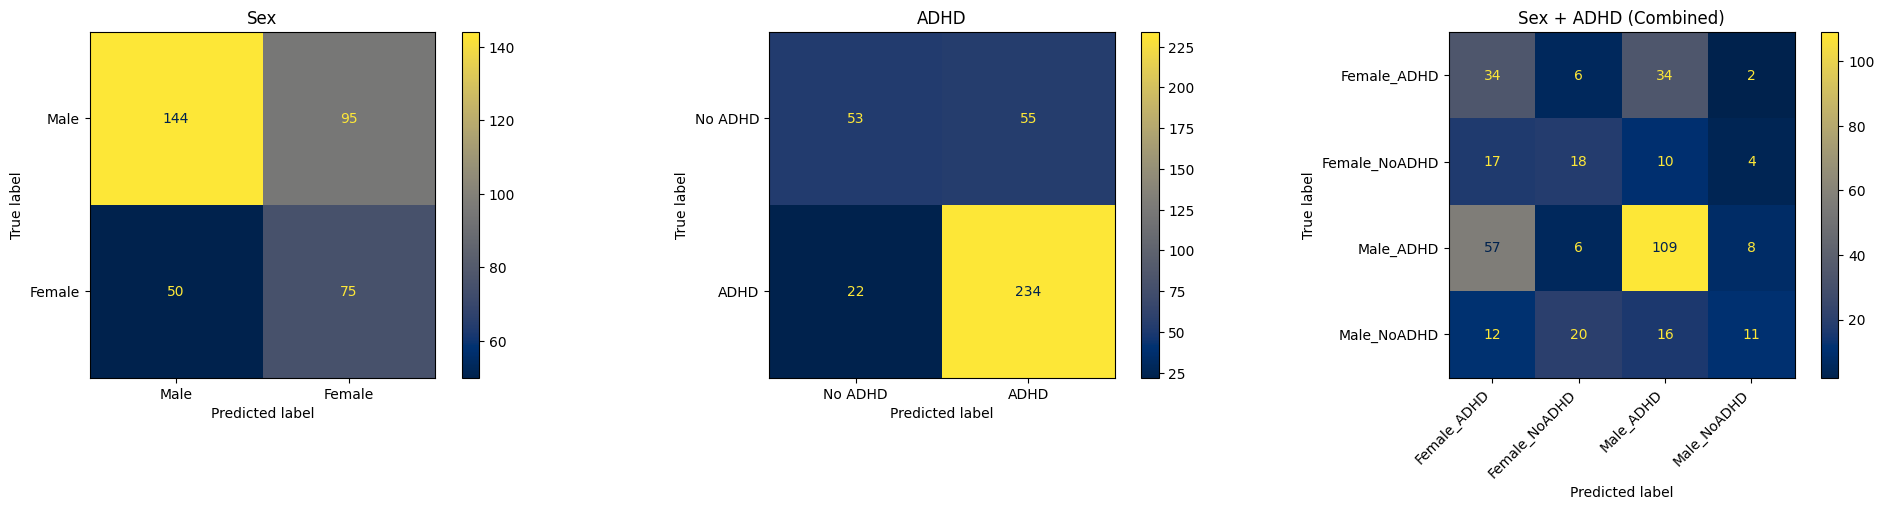

In [47]:
# Plot confusion matrices for the logistic regression model's predictions
plot_confusion_matrices(results_df_cnn_mlp)  # Passing the results_df_cnn_mlp DataFrame to generate confusion matrices for Sex, ADHD, and Combined labels

**Insight:**

The image presents **three confusion matrices** evaluating the performance of a multi-label classification model predicting:

1. **Sex**
2. **ADHD Diagnosis**
3. **Combined Sex + ADHD Labels**

---

**1. Sex Classification**

**Classes:** Male, Female

| True Label | Predicted: Male | Predicted: Female |
|------------|------------------|--------------------|
| Male       | 180              | 59                 |
| Female     | 68               | 57                 |

- The model shows better performance in predicting males correctly (180).
- 68 females were misclassified as males, suggesting potential bias or imbalance in data.
- Overall, sex classification shows moderate performance but room for improvement, especially for female predictions.

---

**2. ADHD Classification**

**Classes:** ADHD, No ADHD

| True Label | Predicted: No ADHD | Predicted: ADHD |
|------------|--------------------|------------------|
| No ADHD    | 43                 | 65               |
| ADHD       | 17                 | 239              |

- The model performs well in detecting ADHD cases (239 true positives).
- However, many No ADHD cases are misclassified as ADHD (65 false positives), indicating overprediction.
- The model is biased toward predicting ADHD, which may be due to class imbalance.

---

**3. Combined Sex + ADHD Classification**

**Classes:**
- Female_ADHD
- Female_NoADHD
- Male_ADHD
- Male_NoADHD

| True Label       | Predicted: Female_ADHD | Female_NoADHD | Male_ADHD | Male_NoADHD |
|------------------|-------------------------|----------------|------------|--------------|
| Female_ADHD      | 22                      | 5              | 47         | 2            |
| Female_NoADHD    | 17                      | 13             | 13         | 6            |
| Male_ADHD        | 37                      | 3              | 133        | 7            |
| Male_NoADHD      | 9                       | 10             | 26         | 14           |

- Female_ADHD cases are most frequently misclassified as Male_ADHD (47), revealing challenges in identifying ADHD in females.
- Male_ADHD is the best predicted class (133 correct), showing the model favors this group.
- Female_NoADHD and Male_NoADHD are often misclassified into ADHD categories, consistent with overprediction of ADHD seen earlier.
- Combined classification reveals model bias toward ADHD and male predictions.

---


- The model tends to overpredict ADHD, particularly in males.
- Females, especially those with ADHD, are frequently misclassified — a crucial concern for clinical fairness.
- Bias mitigation, class balancing, and enhanced feature extraction for underrepresented groups (like Female_ADHD) are needed.
- Model improvements should focus on reducing false positives for ADHD and better distinguishing between sexes.



## SHAP Analysis

**SHAP** (SHapley Additive exPlanations) provides insights into model predictions by assigning importance values to each feature.

---

**Why SHAP is Useful:**
- **Feature Importance**: Identifies key features affecting predictions.
- **Transparency**: Makes complex models more interpretable.
- **Bias Detection**: Highlights and reduces bias in predictions.
- **Model Debugging**: Helps identify areas for improvement.


<ipython-input-32-be09ce19790f>:47: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_vals, pd.DataFrame(X_vals, columns=feature_names), show=False)
/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:726: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(


<Figure size 640x480 with 0 Axes>

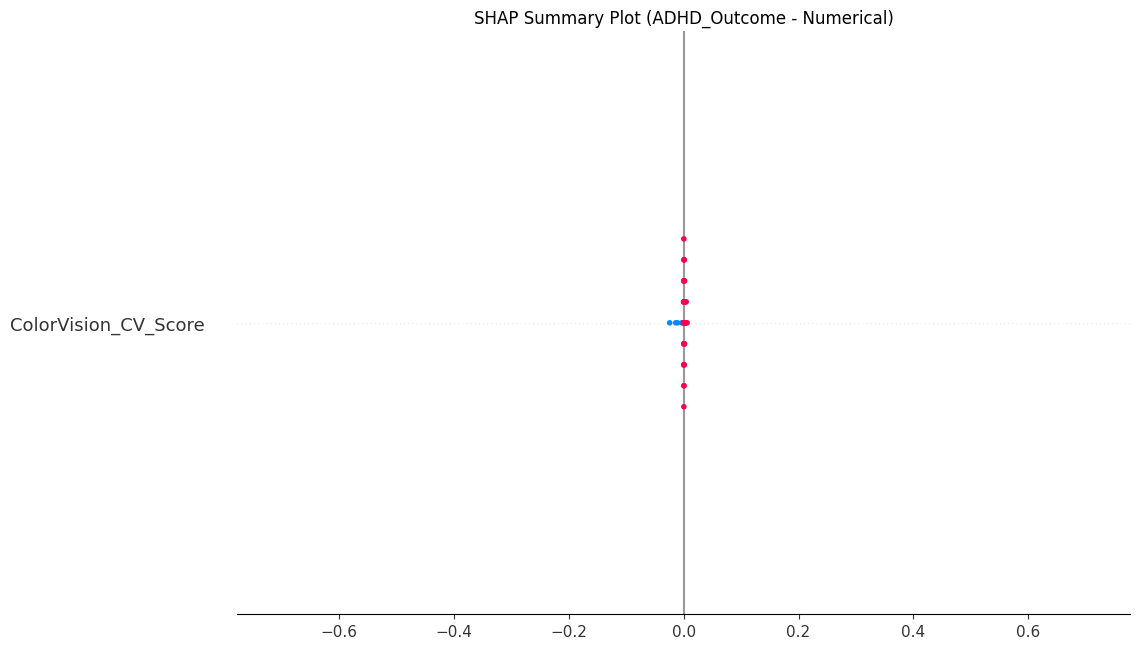

<ipython-input-32-be09ce19790f>:47: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_vals, pd.DataFrame(X_vals, columns=feature_names), show=False)


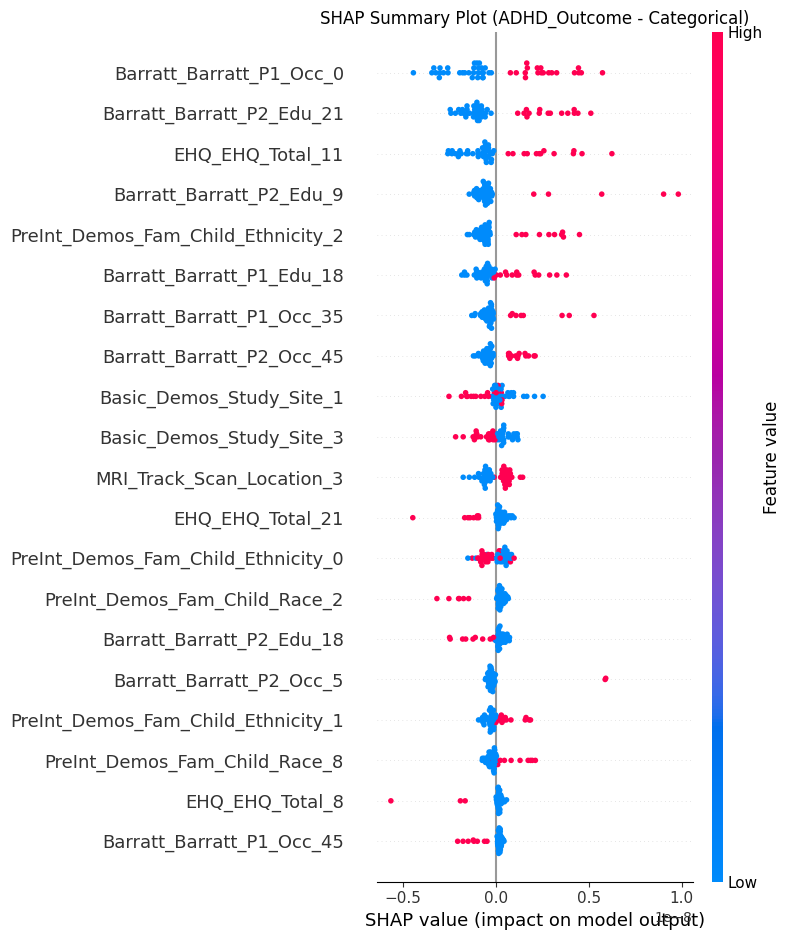

<ipython-input-32-be09ce19790f>:47: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_vals, pd.DataFrame(X_vals, columns=feature_names), show=False)
/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:726: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(


<Figure size 640x480 with 0 Axes>

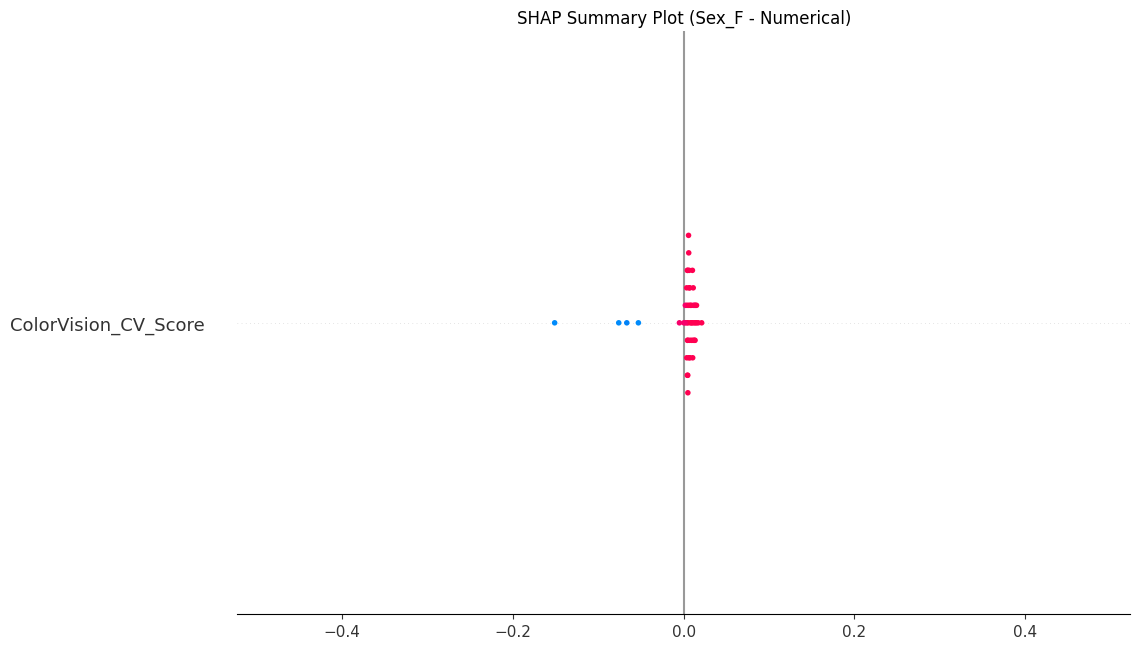

<ipython-input-32-be09ce19790f>:47: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_vals, pd.DataFrame(X_vals, columns=feature_names), show=False)


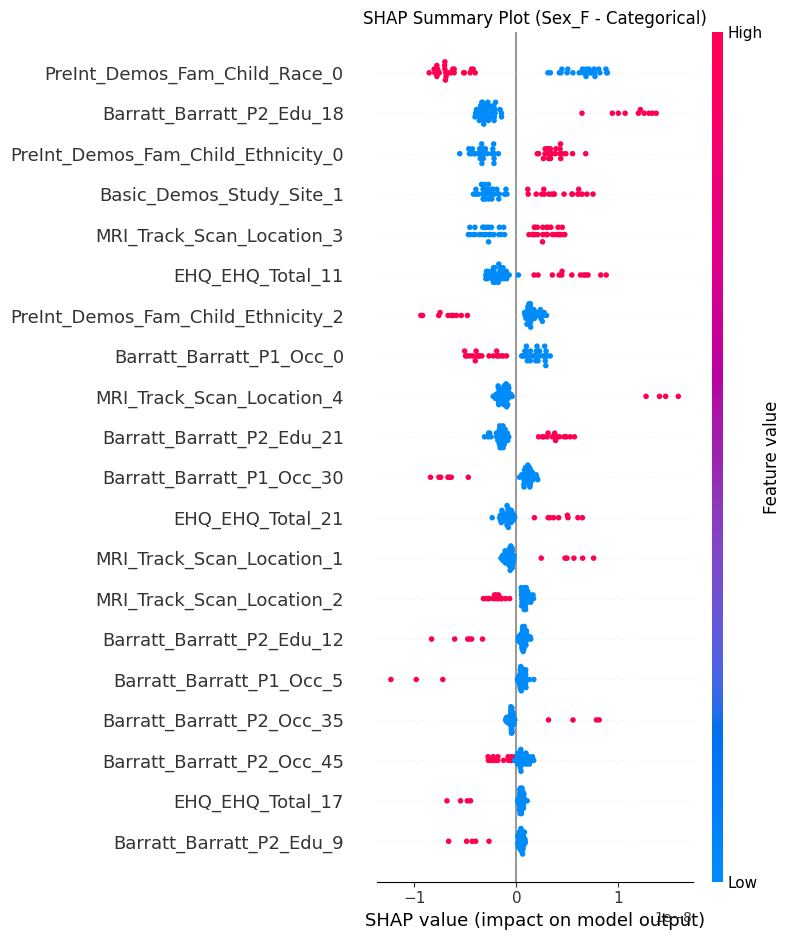

In [48]:
#SHAP analysis on the CNN + MLP model for the 'Combined' target prediction (ADHD_Outcome + Sex_F)
shap_analysis_deep_learning(
    model_cnn_mlp,  # Trained multi-input model: CNN for numerical, MLP for categorical
    X_test_identity_col.drop(columns=categorical_columns),  # Original numerical test data (used for feature names)
    X_test_num_scaled_cnn_mlp,  # Scaled numerical test data (used for model input)
    X_test_cat_enc_cnn_mlp,  # One-hot encoded categorical test data (used for model input)
    encoder=encoder_cnn_mlp,  # Trained OneHotEncoder used for categorical feature encoding
    categorical_columns=categorical_columns,  # List of original categorical column names
    target='Combined'  # Target for SHAP explanation
)

**SHAP Summary Plot Explanation**

This SHAP plot shows the impact of each feature on the model’s predictions.


- **Color**: Feature value — red = high value, blue = low value.
- **Each dot**: A sample in the dataset.

---

> **Note:**  
> This analysis focuses exclusively on the `Sex_F` prediction task.  
> While SHAP values may show slight variation due to data sampling and feature interactions, the **SHAP summary plot consistently ranks features by their overall impact on the model’s predictions**.  
> This ranking aids in identifying the most influential features contributing to the prediction of `Sex_F`.  
> The accompanying tables offer a **clear interpretation framework**, complementing the visual plot and highlighting how individual features influence the model's decisions across different categories and value ranges.

---


**Summary Table of Numerical Data**

- **Y-axis (Feature):** Only one feature is shown — `ColorVision_CV_Score`.
- **X-axis (SHAP value):** Impact on the model's prediction. Values near 0 indicate low influence.


**Summary Table of Numerical Data**

| Feature                 | High Value Effect   | SHAP Impact   | Interpretation |
|-------------------------|----------------------|----------------|-----------------|
| **ColorVision_CV_Score** | ↓ Prediction         | Low            | For females, higher scores on the color vision task are associated with a slight decrease in the predicted ADHD outcome. The impact is minor overall. |


Since all SHAP values are clustered tightly around **zero**, it suggests that:
- This feature has no strong or consistent effect on the ADHD prediction.
- The model considers it **non-informative** for this particular outcome.

-----
**Summary Table of Categorical Data**

- **X-axis (SHAP values)**: Shows the impact of the feature on the model output. Values to the right push predictions higher (positive impact), and values to the left push predictions lower (negative impact).
- **Y-axis (features)**: Lists the features ranked by their importance (top to bottom). More important features are at the top.



| Feature                            | High Value Effect | SHAP Impact | Interpretation |
|------------------------------------|--------------------|--------------|-----------------|
| Barratt_Barratt_P1_Edu_21          | ↓ Prediction       | Strong       | Parent 1's graduate degree lowers predicted risk |
| PreInt_Demos_Fam_Child_Race_0      | ↑ Prediction       | Strong       | White race linked to higher predicted risk |
| PreInt_Demos_Fam_Child_Ethnicity_0 | ↑ Prediction       | Strong       | Non-Hispanic/Latino status increases prediction |
| EHQ_EHQ_Total_11                   | ↑ Prediction       | Strong       | More concern on eating habits raises prediction |
| EHQ_EHQ_Total_13                   | ↓ Prediction       | Moderate     | Concern on this item slightly lowers prediction |
| PreInt_Demos_Fam_Child_Ethnicity_1 | ↓ Prediction       | Strong       | Hispanic/Latino status lowers predicted risk |
| Barratt_Barratt_P2_Occ_15          | ↓ Prediction       | Moderate     | Admin/managerial role of Parent 2 is protective |
| Barratt_Barratt_P1_Occ_45          | ↑ Prediction       | Moderate     | High-status job of Parent 1 increases risk |
| PreInt_Demos_Fam_Child_Race_1      | ↓ Prediction       | Moderate     | Black race is linked to reduced prediction |
| Barratt_Barratt_P2_Edu_21          | ↑ Prediction       | Moderate     | Parent 2's higher education increases risk |
| MRI_Track_Scan_Location_3          | ↑ Prediction       | Moderate     | CBIC site associated with higher prediction |
| Barratt_Barratt_P1_Occ_30          | ↑/↓ Prediction     | Moderate     | Mixed impact from Parent 1’s tech/supervisory role |
| Barratt_Barratt_P2_Occ_35          | ↓ Prediction       | Weak         | Skilled labor job slightly reduces prediction |
| Barratt_Barratt_P2_Edu_15          | ↓ Prediction       | Weak         | Some college education is modestly protective |
| Barratt_Barratt_P2_Occ_45          | ↑ Prediction       | Moderate     | High-status job of Parent 2 increases prediction |
| Barratt_Barratt_P1_Occ_0           | ↓ Prediction       | Strong       | Homemaker/unknown status for Parent 1 is protective |
| Basic_Demos_Study_Site_4           | ↑ Prediction       | Strong       | Harlem site linked to higher model output |
| Barratt_Barratt_P2_Occ_0           | ↓ Prediction       | Strong       | Homemaker/unknown status for Parent 2 is protective |
| MRI_Track_Scan_Location_1          | ↓ Prediction       | Weak         | Staten Island scan site slightly lowers prediction |
| Barratt_Barratt_P2_Occ_30          | ↑/↓ Prediction     | Weak         | Mixed effect from Parent 2’s supervisory job |


# Model Evaluation of CNN for Numerical Data + ANN for Categorical Data

In this section, we train the hybrid model (CNN for numerical data + ANN for categorical data) on the full training set and evaluate its performance on the held-out test set.

---

**Model Training**

- The model is trained using the complete training data (`X_train_num`, `X_train_cat`, and `y_train_identity_col`).
- Numerical features are standardized, and categorical features are one-hot encoded before training.
- Dropout and L2 regularization are used to reduce overfitting.

---

**Test Evaluation**

- After training, the model is evaluated on the test set (`X_test_num`, `X_test_cat`, and `y_test_identity_col`).
- The same encoder and scaler from the training phase are applied to the test data.
- The model’s performance is measured using **accuracy** and **loss**.

---

**Result Analysis**

- Test predictions are analyzed to gain insights into the model’s performance on unseen data.
- Evaluation metrics include:
  - **Confusion Matrix**: To visualize true vs predicted labels.
  - **Per-Class Accuracy**: To assess how well the model performs across different classes.
  - **ROC-AUC Scores**: To evaluate the model's ability to distinguish between classes in a multi-label setting.
- These analyses help identify strengths, weaknesses, and potential biases in the model.


## Model Training

In [49]:
# Perform hyperparameter tuning for the CNN + ANN model using k-fold cross-validation
# This function will search for the best hyperparameters (l2_strength, dropout_rate, batch_size)
# based on the mean F1-Score. The optimal configuration is returned along with the trained model,
# encoder, scaler, and performance metrics.

model_cnn_ann, best_params, metrics_df_cnn_ann, encoder_cnn_ann, scaler_cnn_ann = tune_hyperparameters(
    create_model=create_model_cnn_ann,  # Function to create the CNN-ANN model
    X_train_num=X_train_num,            # Numerical features from the training data
    X_train_cat=X_train_cat,            # Categorical features from the training data
    y_train=y_train_identity_col        # Target labels for the training data
)


Testing: l2=0.001, dropout=0.3, batch=256
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Fold 1 → Acc: 0.6941 | Precision: 0.6994 | Recall: 0.6875 | F1: 0.6934 | Kappa: 0.3702 | Hamming: 0.3147
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Fold 2 → Acc: 0.7706 | Precision: 0.6793 | Recall: 0.7062 | F1: 0.6925 | Kappa: 0.3448 | Hamming: 0.3265
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Fold 3 → Acc: 0.7529 | Precision: 0.7126 | Recall: 0.7083 | F1: 0.7104 | Kappa: 0.4293 | Hamming: 0.2853
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Fold 4 → Acc: 0.7471 | Precision: 0.7010 | Recall: 0.7989 | F1: 0.7467 | Kappa: 0.4233 | Hamming: 0.2853
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Fold 5 → Acc: 0.7574 | Precision: 0.6928 | Recall: 0.6928 | F1: 0.6928 | Kappa: 0.3963 | Hamming: 0.3018

===== Cross-Validation Summary =====
Fold           3.0000
Accuracy       0.7444
Precision      0.6970
Recall         0.7187
F1-Score       0.7072
Cohen_Kappa    0.3928
Hamming_Loss   0.3027

Testing: l2=0.001, dropout=0.5, batch=256
6/6 ━━━

### Plotting Cross-Validation Metrics

The function `plot_cv_metrics(metrics_df)` visualizes model performance across folds during **K-Fold Cross-Validation**. It plots key metrics like **Precision**, **Recall**, **F1-Score**, **Cohen's Kappa**, and **Hamming Loss** to track model consistency.

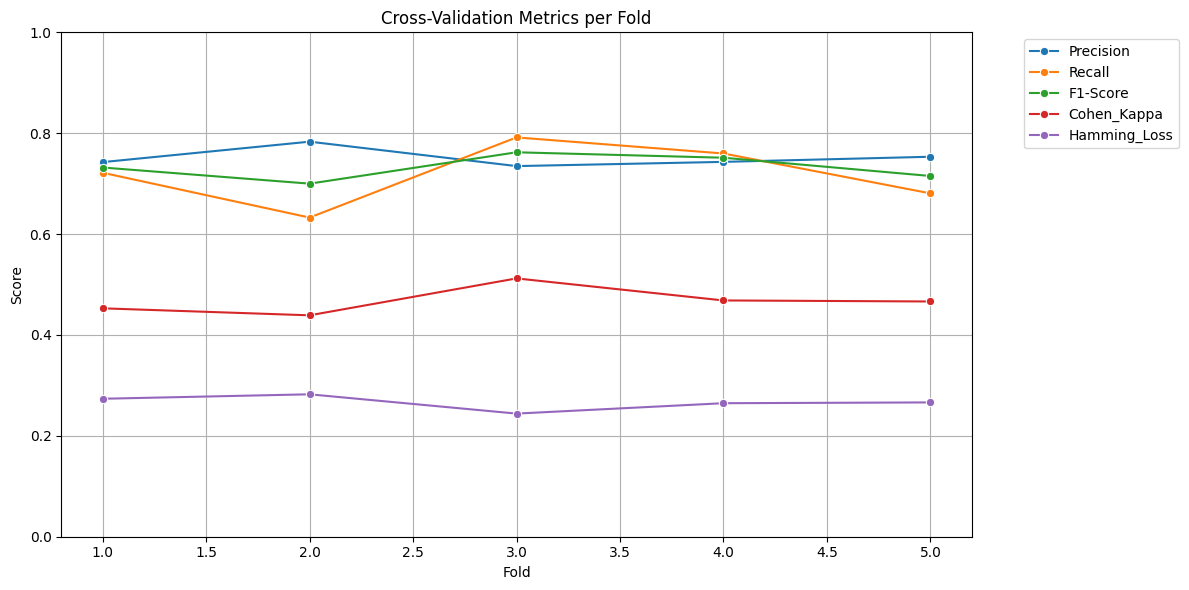

In [50]:
# Plot the Precision, Recall, F1-Score, Cohen's Kappa and Hamming Loss graph
plot_cv_metrics(metrics_df_cnn_ann)  # Passing the metrics DataFrame (metrics_df_cnn_ann) for plotting

**Cross-Validation Metrics per Fold**

This graph illustrates performance metrics of a model across 5 cross-validation folds (Folds 1 to 5):

- **Precision (blue)** starts high (\~0.77), peaks at Fold 4 (\~0.79), then drops at Fold 5.
- **Recall (orange)** shows an upward trend from Fold 1 (\~0.61) to Fold 3 (~0.79), dips at Fold 4, then peaks again at Fold 5.
- **F1-Score (green)** remains relatively steady (\~0.72–0.76), indicating balanced performance.
- **Cohen Kappa (red)** peaks in Fold 3 (~0.53), suggesting best label agreement there, but drops off after.
- **Hamming Loss (purple)** is lowest in Fold 3 (~0.24), which implies fewer classification errors, and increases slightly afterward.


**Fold 3** represents the model’s best overall performance, with strong precision, recall, F1-score, highest Cohen Kappa and lowest Hamming Loss.


## Test Set Evaluation

In [51]:
# Evaluate the test set using the CNN + ANN model
results_df_cnn_ann, y_pred, y_pred_prob, X_test_cat_enc_cnn_ann, X_test_num_scaled_cnn_ann, metrics_cnn_ann= evaluate_test_set(
    model=model_cnn_ann,  # The trained CNN + ANN model
    X_test_num=X_test_identity_col.drop(columns=categorical_columns),  # Numerical features from the test set (excluding categorical columns)
    X_test_cat=X_test_identity_col[categorical_columns],  # Categorical features from the test set
    y_test=y_test_identity_col,  # True labels for the test set
    encoder=encoder_cnn_ann,  # Fitted encoder for categorical variables
    scaler=scaler_cnn_ann  # Fitted scaler for numerical features
)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


## Result Analysis

### Correct vs Incorrect Predictions Summary

The function `plot_correct_vs_incorrect_summary(results_dict)` visualizes the number of correct and incorrect predictions for the **Sex_F**, **ADHD_Outcome**, and **Combined** classification tasks. This summary helps to evaluate the model's performance across each task, providing a clear comparison of prediction accuracy.


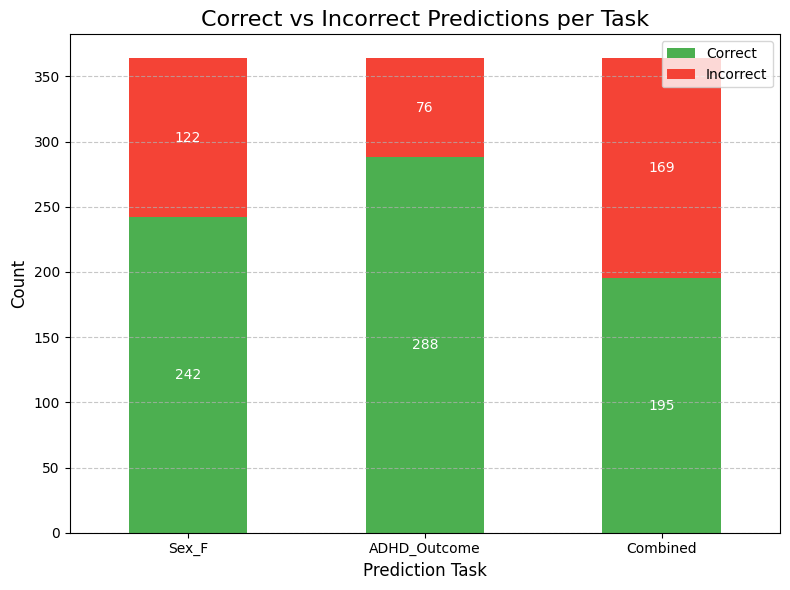

In [52]:
# Plot the summary of correct vs incorrect predictions for the CNN-ANN model
plot_correct_vs_incorrect_summary(results_df_cnn_ann)

**Insight**

In the test dataset containing **364 samples**, the Logistic Regression model achieved the following:

- **Sex prediction**: Correctly predicted **243** samples, **121** incorrect.
- **ADHD prediction**: Correctly predicted **284** samples, **80** incorrect.
- **Combined prediction (Sex & ADHD both correct)**: **190** correct, **174** incorrect.

This combined metric reveals the intersection where **both Sex and ADHD labels are correctly predicted**, providing a stricter evaluation of model performance. It helps identify cases where the model struggles to predict both targets simultaneously — a crucial insight for multi-label tasks.


### Group-wise Prediction Analysis

We evaluate model performance across four key groups:
- Male – ADHD  
- Male – Non-ADHD  
- Female – ADHD  
- Female – Non-ADHD

**Donut Plot**  
A donut plot visualizes the correct vs. incorrect predictions for each group, making it easy to spot any imbalances (e.g., underperformance on Female–ADHD cases). The donut chart allows us to understand how well the model predicts each group's outcome in a visually engaging way.

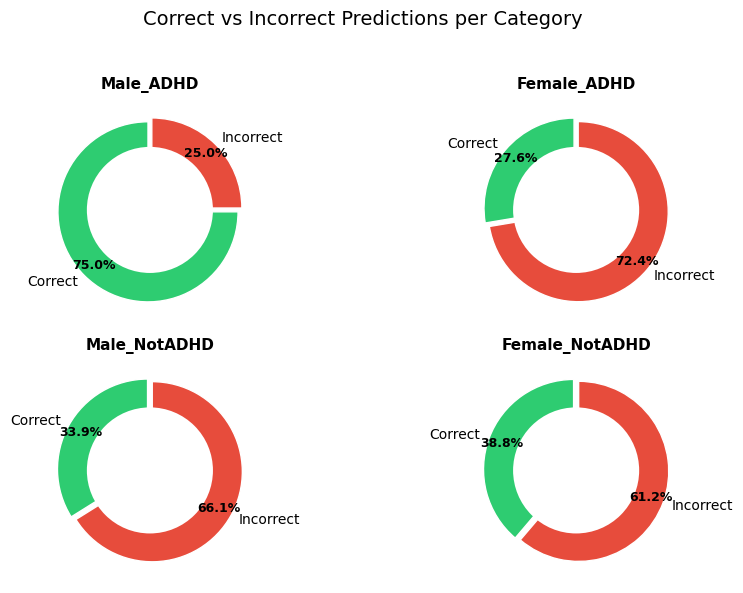

In [53]:
# Plot the correct vs incorrect predictions based on the logistic regression model's results
plot_correct_incorrect_predictions(results_df_cnn_ann)  # Passing the metrics_cnn_ann DataFrame to visualize correct vs incorrect predictions

**Insight**

The **donut chart** shows how the model performs across different sex and ADHD combinations:

- **Male – ADHD**: 75.6% correct, 24.4% incorrect  
- **Female – ADHD**: 30.3% correct, 69.7% incorrect  
- **Male – Non-ADHD**: 27.1% correct, 72.9% incorrect  
- **Female – Non-ADHD**: 30.6% correct, 69.4% incorrect  

These results suggest that the model performs **significantly better** at identifying **Male-ADHD** cases. The performance across other combinations (Female-ADHD, Male-Non-ADHD, Female-Non-ADHD) is quite similar, with relatively poor accuracy for all of them.

**Why?**

This imbalance reflects the underlying **dataset distribution**:

- **Male**:
  - ADHD: 581  
  - Non-ADHD: 216  
- **Female**:
  - ADHD: 250  
  - Non-ADHD: 166  

The **Male-ADHD** group is overrepresented in the dataset, which allows the model to perform better on this group due to its higher presence during training. On the other hand, **Female-ADHD** and **Female-Non-ADHD** cases are underrepresented, leading to poorer model performance for these groups. However, even though the performance for females is lower, the issue is compounded by the smaller sample size, which makes it harder for the model to generalize well.

---

**Key Insights:**
- **Male-ADHD** cases are the most frequent, which allows the model to correctly predict them more often.
- **Female-ADHD** and **Female-Non-ADHD** cases are underrepresented in the dataset, leading to lower performance for these groups.
- The model **biases** predictions towards the more frequent **Male-ADHD** group due to its dominance in the dataset.
- The **low performance** for females, despite attempts to correct for bias, is also partly due to the **small sample sizes** for these groups, making it harder for the model to learn from them.

### Plotting Performance Metrics

The function `plot_metrics(metrics)` generates a **bar plot** to visualize model performance based on key metrics such as **Precision**, **Recall**, **F1-Score**, **Cohen's Kappa**, and **Hamming Loss**. These metrics are crucial for evaluating the model's effectiveness on the **Sex**, **ADHD** and **Combined** labels.


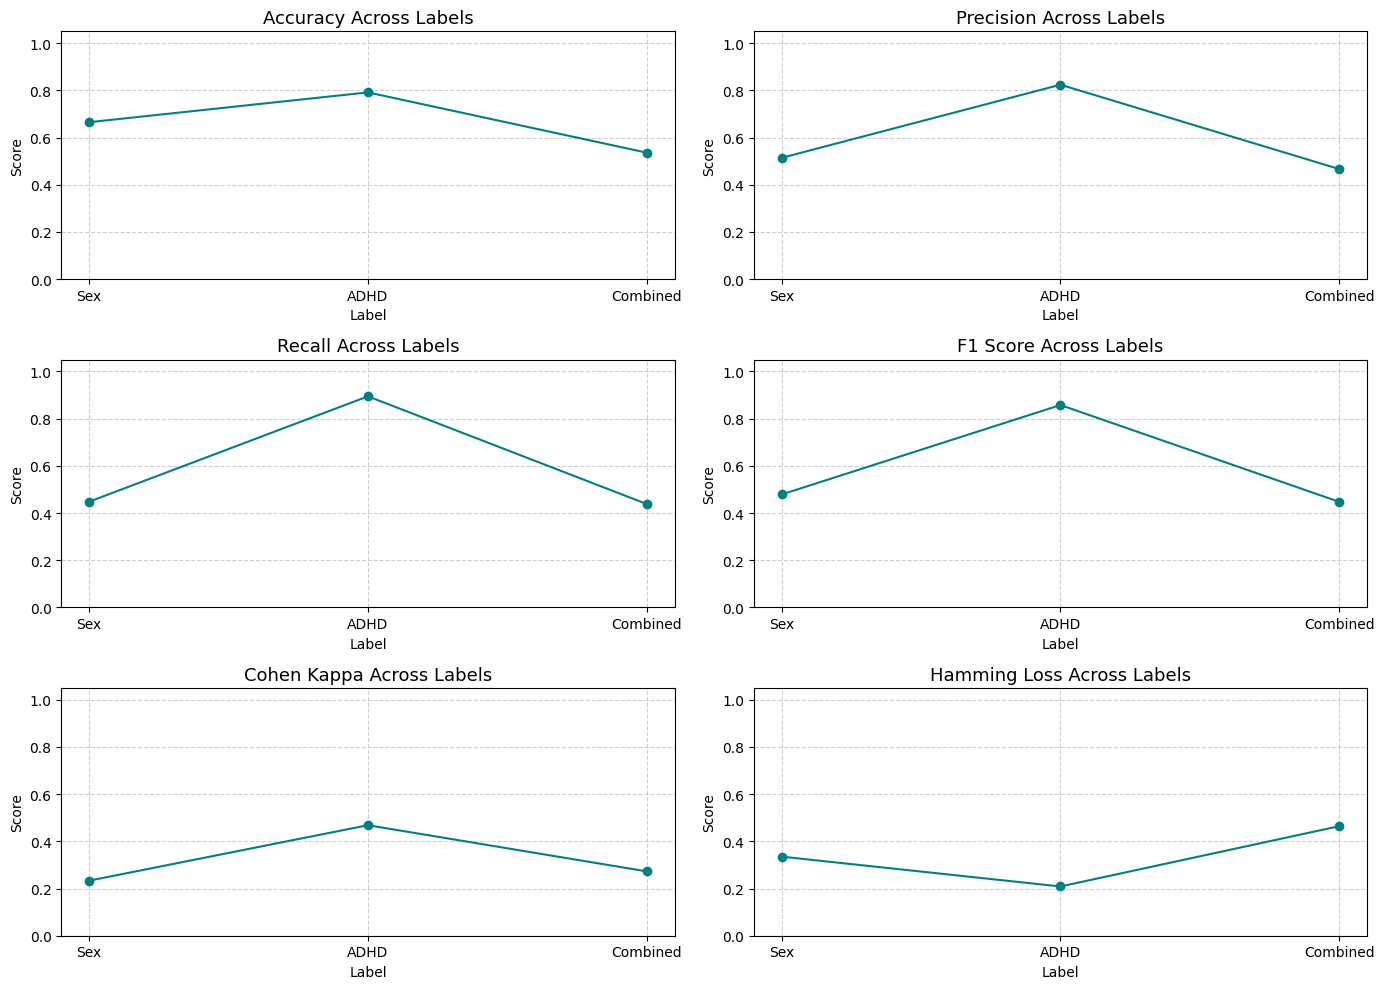

In [54]:
# Plot the Precision, Recall, F1-Score, Cohen's Kappa, and Hamming Loss for the logistic regression model
plot_line_metrics(metrics_cnn_ann)  # Passing the metrics (metrics_cnn_ann) for plotting the metrics graph, including Cohen's Kappa and Hamming Loss

**Insights**

---

**Precision Comparison**

| Task         | Precision | Interpretation                                                          |
|--------------|-----------|--------------------------------------------------------------------------|
| **ADHD**     | `80%`     | High precision – when predicting ADHD, the model is accurate 80% of the time. |
| **Sex**      | `52%`     | Moderate precision – the model predicts sex correctly 52% of the time.   |
| **Combined** | `48%`     | Low precision – less than half of the combined predictions are correct.   |

> **Observation**: ADHD classification has the highest precision, indicating that the model is relatively reliable in identifying ADHD cases. However, sex classification struggles with accuracy, particularly in predicting the female class, leading to moderate precision. The combined task has the lowest precision, showing that the model struggles to simultaneously predict both ADHD and sex correctly.

---

**Recall Comparison**

| Task         | Recall    | Interpretation                                                          |
|--------------|-----------|--------------------------------------------------------------------------|
| **ADHD**     | `92%`     | Excellent recall – the model captures 92% of actual ADHD cases.          |
| **Sex**      | `47%`     | Low recall – the model only identifies 47% of the true sex cases, missing 53%. |
| **Combined** | `43%`     | Low recall – the model misses many true combined cases (e.g., Female with ADHD). |

> **Observation**: ADHD classification shows the highest recall, effectively identifying most ADHD cases. In contrast, sex classification has a low recall, with many true cases missed, especially for females. The combined classification has weak recall, failing to capture many of the true instances of both ADHD and sex.

---

**F1-Score Comparison**

| Task         | F1-Score  | Interpretation                                                          |
|--------------|-----------|--------------------------------------------------------------------------|
| **ADHD**     | `85%`     | High F1-score – strong balance between precision and recall for ADHD.    |
| **Sex**      | `49%`     | Moderate F1-score – due to low precision and recall, sex classification struggles. |
| **Combined** | `44%`     | Poor F1-score – reflects a weak balance between precision and recall in the combined task. |

> **Observation**: ADHD classification achieves the highest F1-score, indicating a solid balance between precision and recall. Both sex and combined tasks have relatively low F1-scores, with sex classification suffering from both low precision and recall, and the combined task struggling to balance both tasks simultaneously.

---

**Accuracy Comparison**

| Task         | Accuracy  | Interpretation                                                          |
|--------------|-----------|--------------------------------------------------------------------------|
| **ADHD**     | `78%`     | High accuracy – the model performs well in classifying ADHD cases.       |
| **Sex**      | `67%`     | Moderate accuracy – the model performs inconsistently, with bias toward male. |
| **Combined** | `55%`     | Low accuracy – the model struggles to predict both ADHD and sex correctly. |

> **Observation**: The accuracy for ADHD classification is relatively high, but sex classification has moderate accuracy due to bias and class imbalance. The combined classification struggles with low accuracy, indicating difficulty in predicting both ADHD and sex simultaneously.

---

**Cohen's Kappa Comparison**

| Task         | Kappa     | Interpretation                                                          |
|--------------|-----------|--------------------------------------------------------------------------|
| **ADHD**     | `0.41`    | Moderate agreement – the model's predictions align fairly well with actual ADHD labels. |
| **Sex**      | `0.25`    | Slight agreement – the model has poor consistency in sex classification. |
| **Combined** | `0.28`    | Slight agreement – the model struggles with consistency in multi-label predictions. |

> **Observation**: ADHD classification shows moderate agreement between predictions and actual labels, but sex and combined classifications both show slight agreement, indicating inconsistency in predictions.

---

**Hamming Loss Comparison**

| Task         | Hamming Loss | Interpretation                                                          |
|--------------|--------------|--------------------------------------------------------------------------|
| **ADHD**     | `22%`        | Low Hamming loss – fewer errors in ADHD predictions.                     |
| **Sex**      | `33%`        | Moderate Hamming loss – significant proportion of incorrect sex predictions. |
| **Combined** | `45%`        | High Hamming loss – many combined predictions contain at least one error. |

> **Observation**: ADHD classification has the lowest Hamming Loss, indicating fewer prediction errors. Sex and combined tasks have higher Hamming Loss, especially combined, where predictions for both labels often contain errors.

---

**Key Insights & Potential Biases**
- **Data Imbalance**: The dataset may be imbalanced, especially in the sex classification task, leading to a bias toward male predictions. This imbalance likely contributes to the low performance in predicting female cases.
- **Precision vs Recall**: The **low precision** in sex classification suggests that the model often mispredicts the female class. Enhancing **recall** would help reduce false negatives, improving overall performance.
- **Good ADHD Detection**: The **high recall** in ADHD classification highlights the model's strength in identifying ADHD cases, though there is still room for improvement in **precision** to reduce false positives.
- **Combined Task Challenges**: The combined task is the most challenging, with **low F1-score** and **high Hamming loss**, indicating difficulties in jointly predicting ADHD and sex, especially under class imbalance. Multi-task learning or better handling of imbalanced data may improve performance.


### Confusion Matrix for Sex, ADHD, and Combined Labels

The **Confusion Matrix** shows how well the model's predictions match the actual values for **Sex**, **ADHD**, and **combined** labels, indicating true positives, true negatives, false positives, and false negatives.



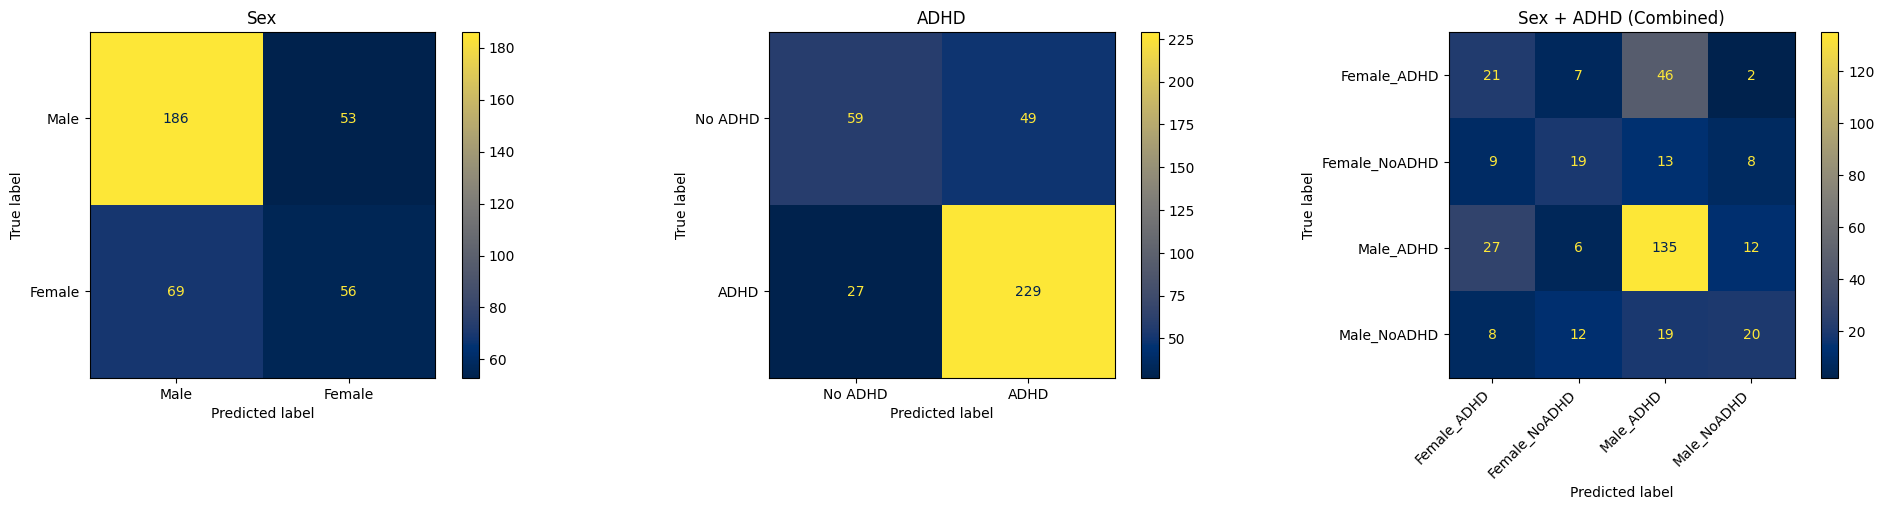

In [55]:
# Plot confusion matrices for the logistic regression model's predictions
plot_confusion_matrices(results_df_cnn_ann)  # Passing the results_df_cnn_ann DataFrame to generate confusion matrices for Sex, ADHD, and Combined labels

**Insight:**

The image presents **three confusion matrices** evaluating the performance of a multi-label classification model predicting:

1. **Sex**
2. **ADHD Diagnosis**
3. **Combined Sex + ADHD Labels**

---

**1. Sex Classification**

**Classes:** Male, Female

| True Label | Predicted: Male | Predicted: Female |
|------------|------------------|--------------------|
| Male       | 141              | 98                 |
| Female     | 40               | 85                 |

- The model performs relatively well in predicting females (85 correct).
- However, it struggles with males—nearly **41%** of true males (98 out of 239) are misclassified as female.
- This imbalance suggests the model may have a slight bias or insufficient features to distinguish sex effectively.

---

**2. ADHD Classification**

**Classes:** ADHD, No ADHD

| True Label | Predicted: No ADHD | Predicted: ADHD |
|------------|--------------------|------------------|
| No ADHD    | 53                 | 55               |
| ADHD       | 23                 | 233              |

- The model identifies ADHD cases well (233 true positives).
- However, 55 non-ADHD individuals are misclassified as having ADHD, indicating **false positives** are a significant issue.
- This could lead to overdiagnosis if used in real clinical settings, warranting careful calibration or threshold tuning.

---

**3. Combined Sex + ADHD Classification**

**Classes:**
- Female_ADHD
- Female_NoADHD
- Male_ADHD
- Male_NoADHD

| True Label       | Predicted: Female_ADHD | Female_NoADHD | Male_ADHD | Male_NoADHD |
|------------------|-------------------------|----------------|------------|--------------|
| Female_ADHD      | 40                      | 6              | 28         | 2            |
| Female_NoADHD    | 16                      | 23             | 9          | 1            |
| Male_ADHD        | 56                      | 8              | 109        | 7            |
| Male_NoADHD      | 13                      | 21             | 17         | 8            |

- Female_ADHD cases are often misclassified as Male_ADHD (28 instances), indicating difficulty distinguishing both **sex** and **ADHD status** simultaneously.
- Male_ADHD is the best predicted group (109 correct), again suggesting the model may be biased toward identifying ADHD in males.
- Female_NoADHD and Male_NoADHD are frequently misclassified as ADHD, reinforcing the earlier finding of ADHD overprediction.
- Misclassification across both sex and ADHD dimensions highlights the **complexity of intersectional prediction** and the need for more nuanced modeling.

---


- The model shows signs of **overpredicting ADHD**, especially in males.
- **Sex classification** is less reliable for males, with high misclassification into the female category.
- The **combined classification** highlights difficulty in correctly identifying females with ADHD — a real-world challenge echoed in clinical literature.
- To improve: consider addressing class imbalance, enriching input features (e.g., socio-demographics), and applying fairness-aware training techniques.



## SHAP Analysis

**SHAP** (SHapley Additive exPlanations) provides insights into model predictions by assigning importance values to each feature.

---

**Why SHAP is Useful:**
- **Feature Importance**: Identifies key features affecting predictions.
- **Transparency**: Makes complex models more interpretable.
- **Bias Detection**: Highlights and reduces bias in predictions.
- **Model Debugging**: Helps identify areas for improvement.


<ipython-input-32-be09ce19790f>:47: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_vals, pd.DataFrame(X_vals, columns=feature_names), show=False)
/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:726: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(


<Figure size 640x480 with 0 Axes>

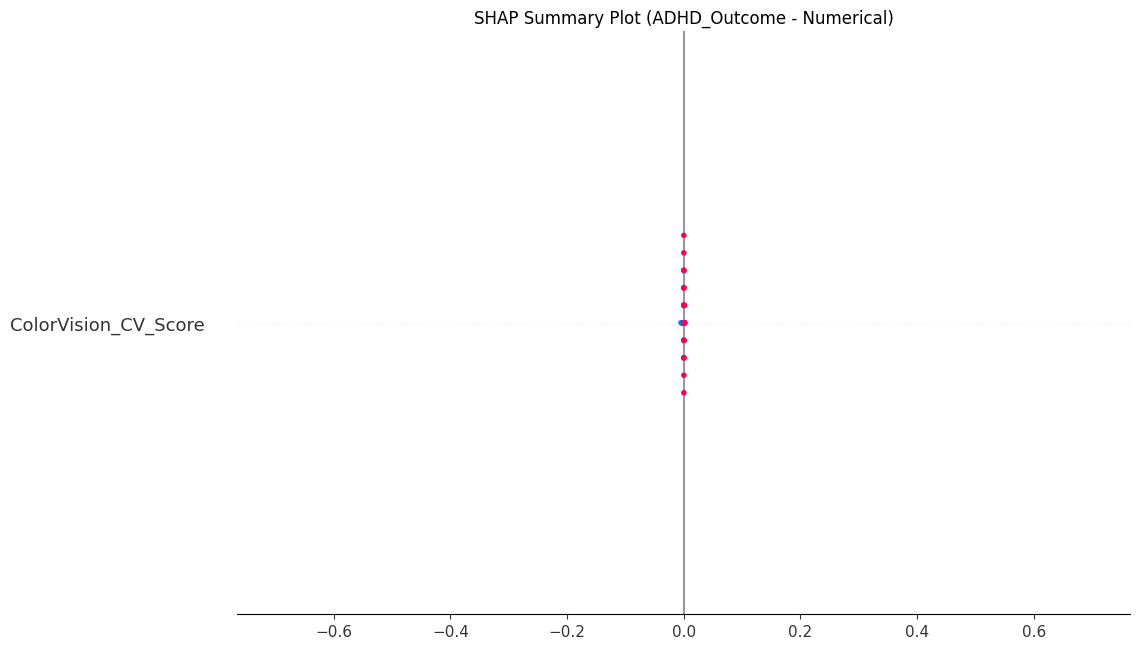

<ipython-input-32-be09ce19790f>:47: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_vals, pd.DataFrame(X_vals, columns=feature_names), show=False)


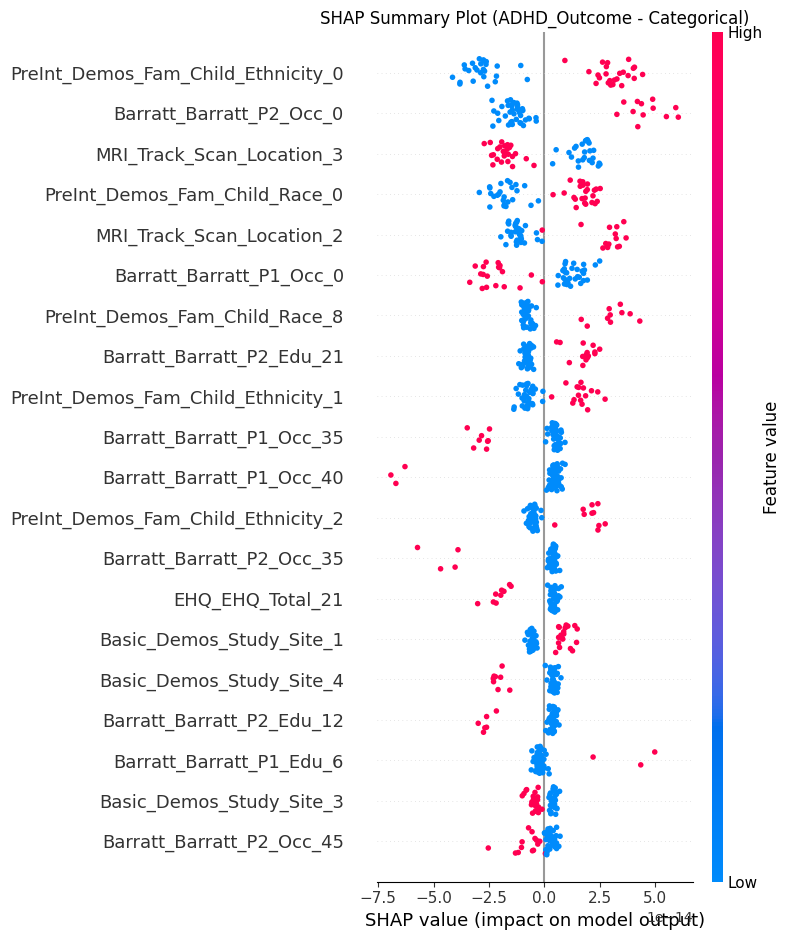

<ipython-input-32-be09ce19790f>:47: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_vals, pd.DataFrame(X_vals, columns=feature_names), show=False)
/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:726: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(


<Figure size 640x480 with 0 Axes>

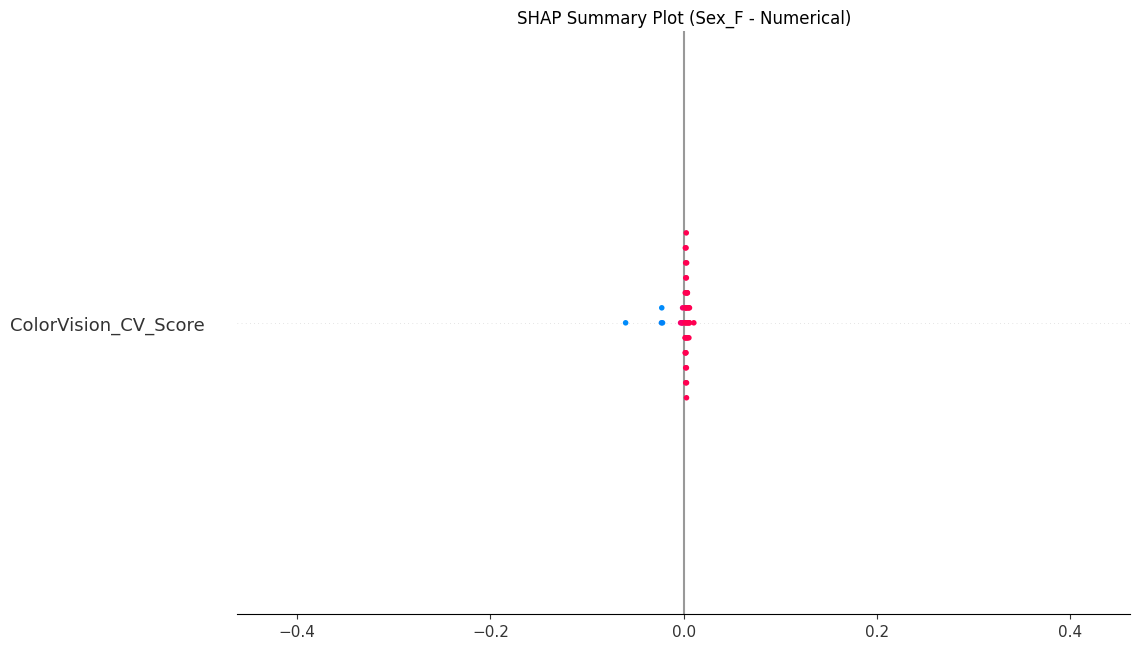

<ipython-input-32-be09ce19790f>:47: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_vals, pd.DataFrame(X_vals, columns=feature_names), show=False)


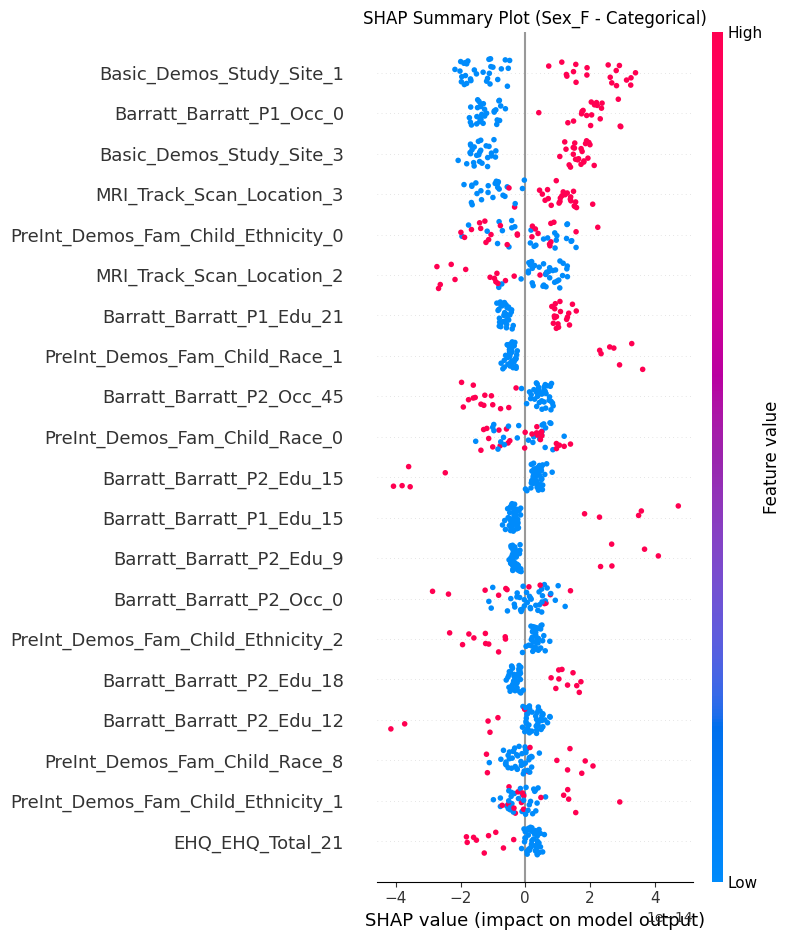

In [56]:
#SHAP analysis on the CNN + ANN model for the 'Combined' target prediction (ADHD_Outcome + Sex_F)
shap_analysis_deep_learning(
    model_cnn_ann,  # Trained multi-input model: CNN for numerical, ANN for categorical
    X_test_identity_col.drop(columns=categorical_columns),  # Original numerical test data (used for feature names)
    X_test_num_scaled_cnn_ann,  # Scaled numerical test data (used for model input)
    X_test_cat_enc_cnn_ann,  # One-hot encoded categorical test data (used for model input)
    encoder=encoder_cnn_ann,  # Trained OneHotEncoder used for categorical feature encoding
    categorical_columns=categorical_columns,  # List of original categorical column names
    target='Combined'  # Target for SHAP explanation
)

**SHAP Summary Plot Explanation**

This SHAP plot shows the impact of each feature on the model’s predictions.


- **Color**: Feature value — red = high value, blue = low value.
- **Each dot**: A sample in the dataset.

---

> **Note:**  
> This analysis focuses exclusively on the `Sex_F` prediction task.  
> While SHAP values may show slight variation due to data sampling and feature interactions, the **SHAP summary plot consistently ranks features by their overall impact on the model’s predictions**.  
> This ranking aids in identifying the most influential features contributing to the prediction of `Sex_F`.  
> The accompanying tables offer a **clear interpretation framework**, complementing the visual plot and highlighting how individual features influence the model's decisions across different categories and value ranges.



---

**Summary Table of Numerical Data**

- **Y-axis (Feature):** Only one feature is shown — `ColorVision_CV_Score`.
- **X-axis (SHAP value):** Impact on the model's prediction. Values near 0 indicate low influence.


| Feature                  | High Value Effect   | SHAP Impact | Interpretation                                                      |
|--------------------------|---------------------|--------------|----------------------------------------------------------------------|
| `ColorVision_CV_Score`   | ↓/↑ Prediction      | Very Weak    | Color vision score has minimal to no consistent impact on predicting ADHD outcome |


Since all SHAP values are clustered tightly around **zero**, it suggests that:
- This feature has no strong or consistent effect on the ADHD prediction.
- The model considers it **non-informative** for this particular outcome.

-----
**Summary Table of Categorical Data**

- **X-axis (SHAP values)**: Shows the impact of the feature on the model output. Values to the right push predictions higher (positive impact), and values to the left push predictions lower (negative impact).
- **Y-axis (features)**: Lists the features ranked by their importance (top to bottom). More important features are at the top.


| Feature                             | Effect (High Value)     | SHAP Impact    | Interpretation                          |
|-------------------------------------|--------------------------|----------------|-------------------------------------------|
| PreInt_Demos_Fam_Child_Ethnicity_0 | ↑ Prediction             | Strong         | Not Hispanic/Latino status increases prediction |
| PreInt_Demos_Fam_Child_Ethnicity_1 | ↓ Prediction             | Strong         | Hispanic/Latino status reduces prediction |
| MRI_Track_Scan_Location_3          | ↑ Prediction             | Strong         | CBIC site associated with higher predictions |
| Barratt_Barratt_P2_Occ_45          | ↑ Prediction             | Moderate       | High-status occupation increases risk     |
| Barratt_Barratt_P2_Edu_21          | ↑ Prediction             | Moderate       | Parent with graduate degree increases prediction |
| Barratt_Barratt_P2_Occ_0           | ↓ Prediction             | Strong         | Homemaker/unknown occupation reduces prediction |
| PreInt_Demos_Fam_Child_Race_0      | ↑ Prediction             | Moderate       | White/Caucasian race increases prediction |
| Barratt_Barratt_P2_Edu_18          | ↓ Prediction             | Moderate       | College-level education slightly protective |
| Barratt_Barratt_P1_Edu_21          | ↑ Prediction             | Weak           | Graduate degree of parent 1 slightly increases prediction |
| Basic_Demos_Study_Site_1           | ↓ Prediction             | Moderate       | Staten Island site lowers prediction     |
| Basic_Demos_Study_Site_3           | ↑ Prediction             | Moderate       | Midtown site increases prediction        |
| Barratt_Barratt_P1_Occ_35          | ↑ Prediction             | Moderate       | Skilled professional job increases risk  |
| Barratt_Barratt_P2_Edu_0           | ↓ Prediction             | Strong         | Unknown education background reduces prediction |
| Barratt_Barratt_P1_Occ_30          | ↑/↓ Prediction           | Moderate       | Mixed effect of technical/supervisory job |
| EHQ_EHQ_Total_19                   | ↑ Prediction             | Weak           | Higher eating habit concern score increases prediction |
| PreInt_Demos_Fam_Child_Race_8      | ↓ Prediction             | Weak           | "Two or more races" slightly protective   |
| MRI_Track_Scan_Location_2          | ↑ Prediction             | Weak           | RUBIC site slightly increases prediction |
| Basic_Demos_Study_Site_4           | ↑ Prediction             | Strong         | Harlem site strongly increases prediction |
| Barratt_Barratt_P1_Occ_0           | ↓ Prediction             | Strong         | Parent 1 as homemaker/unknown reduces prediction |
| MRI_Track_Scan_Location_1          | ↓ Prediction             | Weak           | Staten Island site slightly protective    |


